# Proyecto: Análisis Exploratorio de los Datos y preparación de un DataSet. 

## Nombre del estudiante: Axel Martin Vega Espinoza   
## Número de control: 20120168   
## Materia/Grupo: Ciencia De Datos/A

El siguiente proyecto tomará como set de datos un conjunto de información sobre los precios de las casas.
El set de datos tiene datos nulos, datos tipo objeto, anomalías, inconsistencias, por lo que es necesario conocimientos previos de EDA para poder prepararlo.
El objetivo es preparar un set de datos para poder usarlo posteriormente en un modelo de ML, no basta con solo volverlo numérico, necesitamos tener conocimientos sobre los datos mismos.
El resultado de esta exploración debe ser:
1. Gráficas y conclusiones acerca de los datos.
2. Eliminación de datos nulos, anomalías e inconsistencias.
3. Generación de un dataframe listo para usarse sobre un modelo de ML (numérico), con las variables, cuya correlación es más fuerte con la variable objetivo, identificadas.


## Análisis y exploración.

### Paso 1: Importar las librerías que se van a utilizar y mostrar las primeras y últimas 5 filas del dataset.

In [1]:
# Importación de las librerías a utilizar.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Quitar limite de columnas máximas
pd.set_option('display.max_columns', None)

In [3]:
# Obtener DataFrame
df = pd.read_csv("DataSets/casas_dataset.csv")
# Configura Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [4]:
# las primeras 5 filas del dataset
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,KitchenQual,TotRmsAbvGrd,Functiol,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#las ultimas 5 filas del dataset
display(df.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,KitchenQual,TotRmsAbvGrd,Functiol,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Paso 2: Mostrar información sobre el dataset, qué tipos son, cuántos nulos hay, datos estadísticos.

In [6]:
# Tipo de cada columna
print(df.info())

#conteo de columnas
i=0
o=0
f=0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.isna().sum()

t = 0
for column in df.columns:
    #print(df[column].isna().sum())
    print("Hay ", df[column].isna().sum(), "datos nulos en la columna: ", column)
    t = t+df[column].isna().sum()
print("\nEN TOTAL HAY ", t, "DATOS NULOS")

Hay  0 datos nulos en la columna:  Id
Hay  0 datos nulos en la columna:  MSSubClass
Hay  0 datos nulos en la columna:  MSZoning
Hay  259 datos nulos en la columna:  LotFrontage
Hay  0 datos nulos en la columna:  LotArea
Hay  0 datos nulos en la columna:  Street
Hay  1369 datos nulos en la columna:  Alley
Hay  0 datos nulos en la columna:  LotShape
Hay  0 datos nulos en la columna:  LandContour
Hay  0 datos nulos en la columna:  Utilities
Hay  0 datos nulos en la columna:  LotConfig
Hay  0 datos nulos en la columna:  LandSlope
Hay  0 datos nulos en la columna:  Neighborhood
Hay  0 datos nulos en la columna:  Condition1
Hay  0 datos nulos en la columna:  Condition2
Hay  0 datos nulos en la columna:  BldgType
Hay  0 datos nulos en la columna:  HouseStyle
Hay  0 datos nulos en la columna:  OverallQual
Hay  0 datos nulos en la columna:  OverallCond
Hay  0 datos nulos en la columna:  YearBuilt
Hay  0 datos nulos en la columna:  YearRemodAdd
Hay  0 datos nulos en la columna:  RoofStyle
Hay  0

In [8]:
for column in df.columns:
    if ((df[column].dtype == "int64") or (df[column].dtype == "float64")):
        print(df[column].describe())
        print("\n")


count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64


count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQ

### Paso 3: Mostrar información sobre las variables "objeto" y revisar si se pueden categorizar (todavía no se categorizan, solo se exploran).

In [9]:
print("Las variables objeto son:")
for column in df.columns:
    if (df[column].dtype == "object"):
        print(column)

Las variables objeto son:
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functiol
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [10]:
print("Sus datos:")
for column in df.columns:
    if (df[column].dtype == "object"):
        print("Para la columna ", column, " estan los siguientes datos únicos:" )
        print(df[column].unique())
        print("Total: ", df[column].nunique())
        if (df[column].nunique() <= 5):
            print("Se puede categorizar mediante one-hot encoding")
        else:
            print("Se puede categorizar mediante label encoding")
        print("\n")

Sus datos:
Para la columna  MSZoning  estan los siguientes datos únicos:
['RL' 'RM' 'C (all)' 'FV' 'RH']
Total:  5
Se puede categorizar mediante one-hot encoding


Para la columna  Street  estan los siguientes datos únicos:
['Pave' 'Grvl']
Total:  2
Se puede categorizar mediante one-hot encoding


Para la columna  Alley  estan los siguientes datos únicos:
[nan 'Grvl' 'Pave']
Total:  2
Se puede categorizar mediante one-hot encoding


Para la columna  LotShape  estan los siguientes datos únicos:
['Reg' 'IR1' 'IR2' 'IR3']
Total:  4
Se puede categorizar mediante one-hot encoding


Para la columna  LandContour  estan los siguientes datos únicos:
['Lvl' 'Bnk' 'Low' 'HLS']
Total:  4
Se puede categorizar mediante one-hot encoding


Para la columna  Utilities  estan los siguientes datos únicos:
['AllPub' 'NoSeWa']
Total:  2
Se puede categorizar mediante one-hot encoding


Para la columna  LotConfig  estan los siguientes datos únicos:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Total:  5
Se puede 

<p style="color:blue;">
    Revisando los valores posibles en cada columna puedo decir que todas las columnas objeto pueden ser categorizadas, ya que gran parte de ellas no superan los 9 valores.
</p>

### Paso 4: Mostrar información sobre las correlaciones (variables numéricas), la variable/columna objetivo es "SalePrice".

<Axes: >

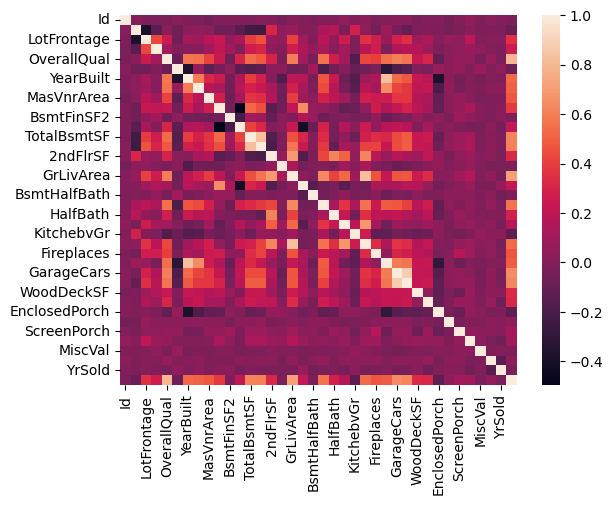

In [11]:
# Primero un vistazo general
sns.heatmap(df.corr(numeric_only=True))

In [12]:
# Ahora la correlación con respecto a la columna ‘SalePrice’
print(df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchebvGr      -0.135907
Name: SalePr

<p style="color:blue;">
    Al mostrar la correlación con respecto a la variable ‘SalePrice’ se aprecia que las columnas con mayor correlación son:   
    
•	OverallQual   
    
•	GrLivArea   
    
•	GarageCars   
    
•	GarageArea   
    
•	TotalBsmtSF   
    
•	1stFlrSF   
    
</p>

### Paso 5: Muestra de gráficas de las variables numéricas y categóricas. 
Puede ser boxplot para las numéricas y de conteo/histograma para las categóricas.

Columna:  1


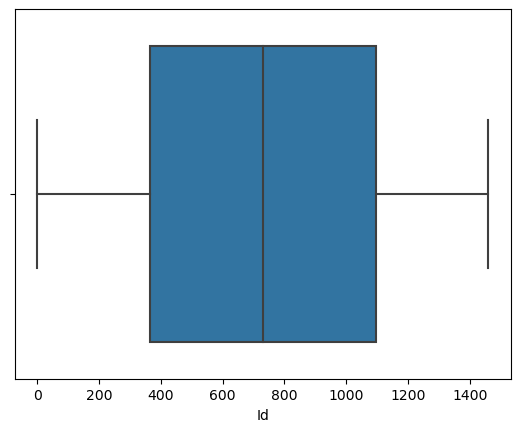

Columna:  2


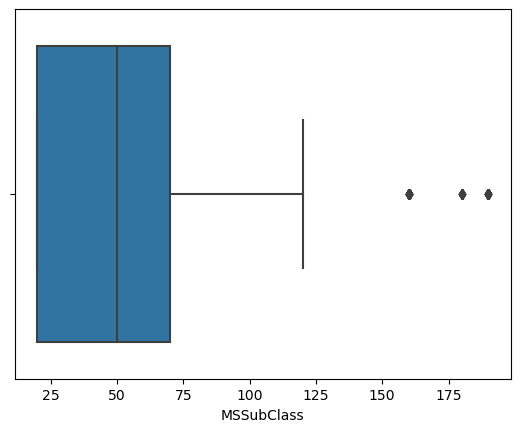

Columna:  3


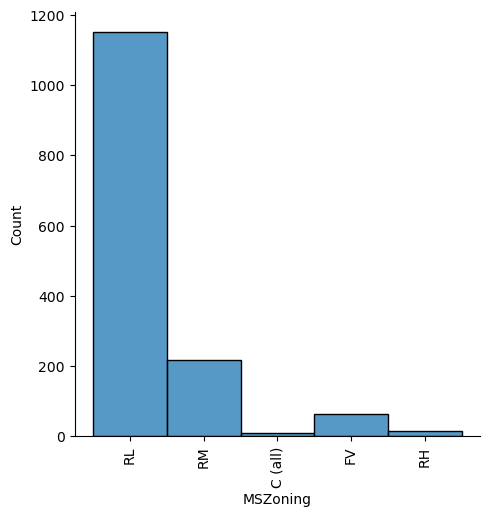

Columna:  4


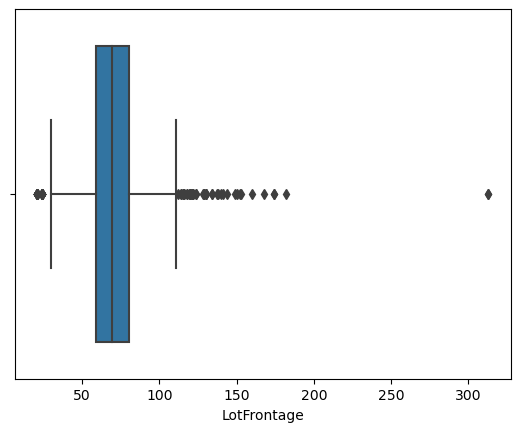

Columna:  5


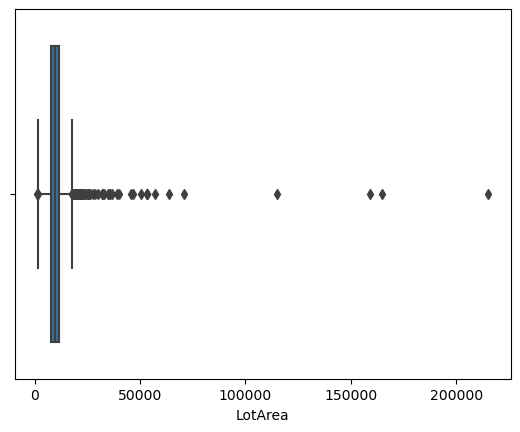

Columna:  6


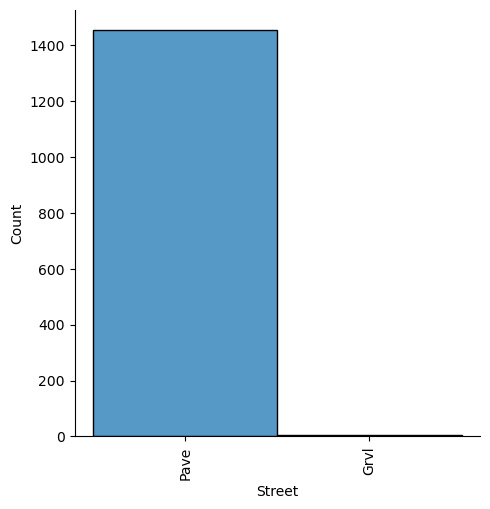

Columna:  7


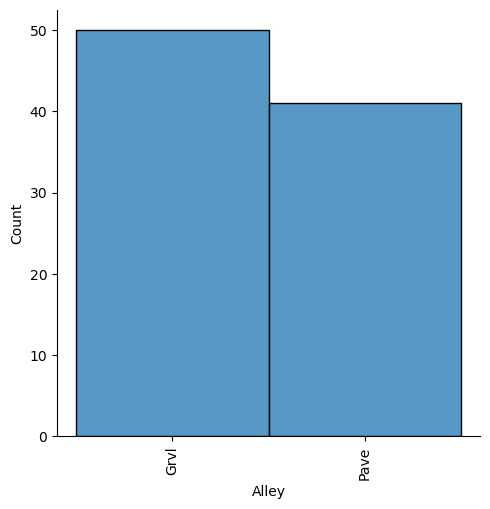

Columna:  8


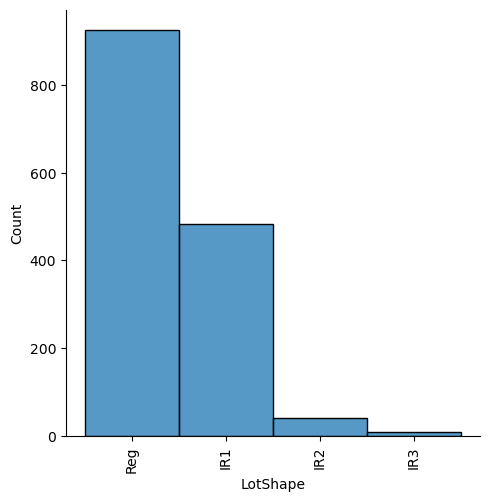

Columna:  9


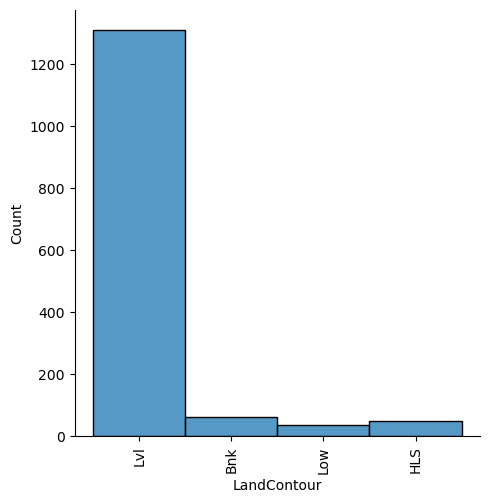

Columna:  10


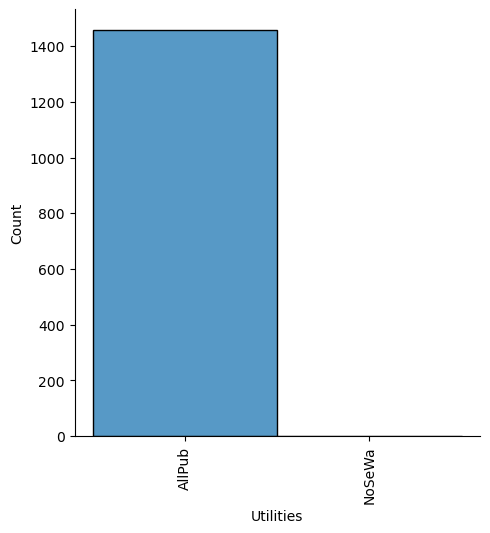

Columna:  11


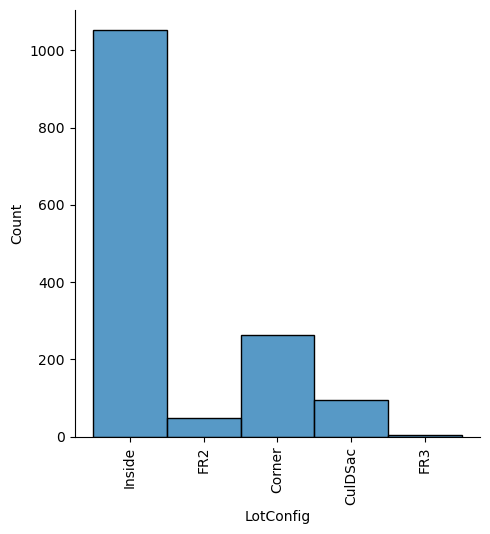

Columna:  12


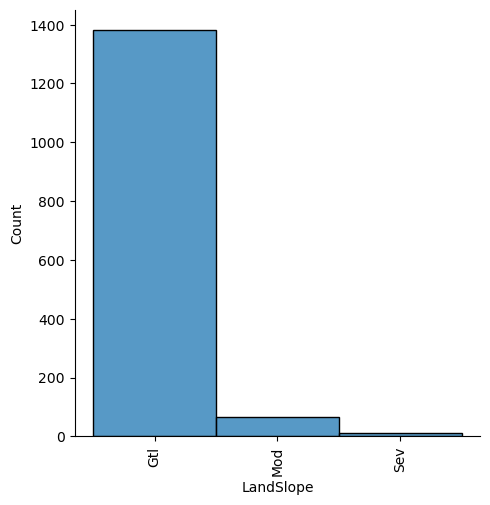

Columna:  13


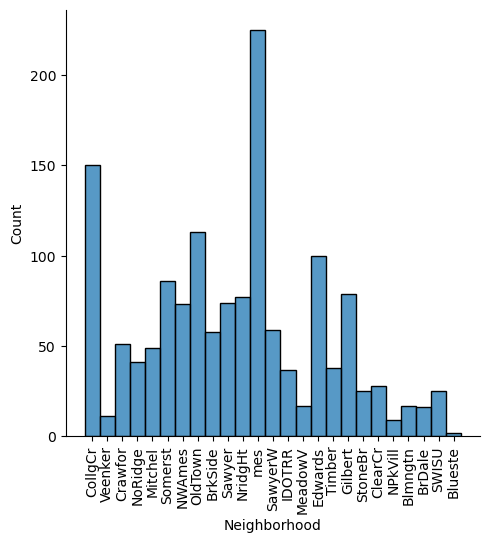

Columna:  14


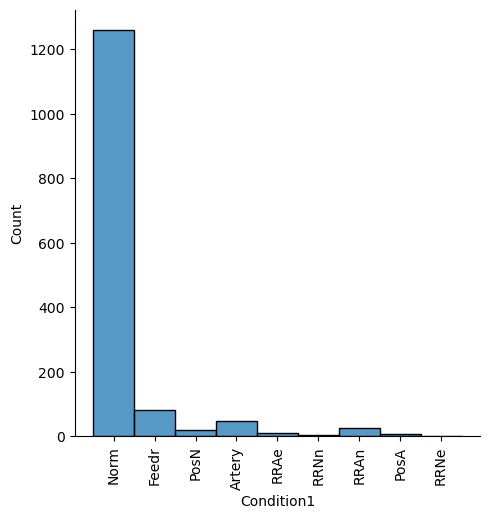

Columna:  15


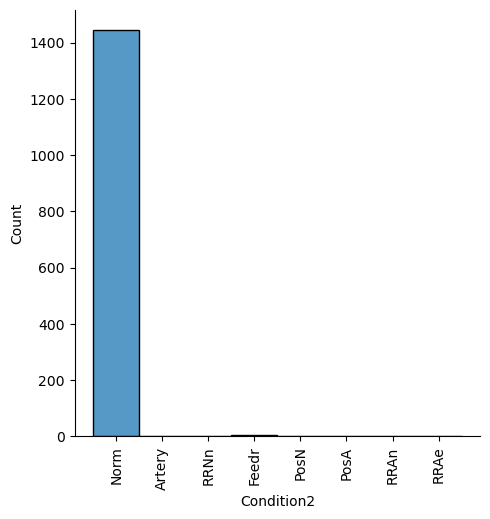

Columna:  16


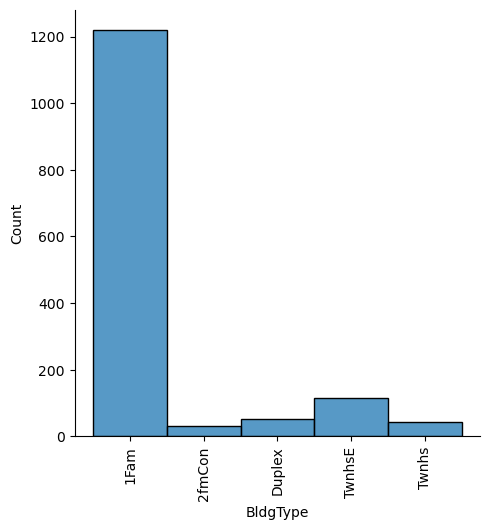

Columna:  17


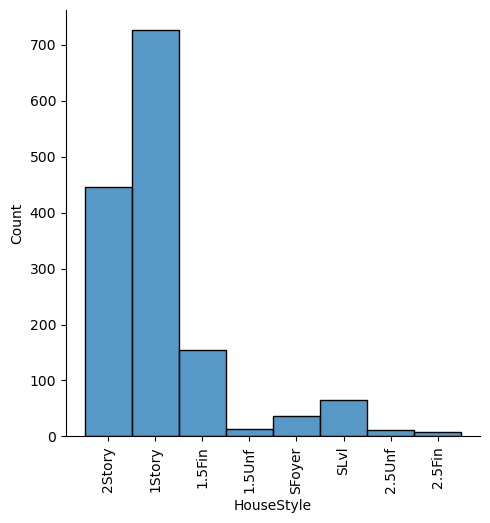

Columna:  18


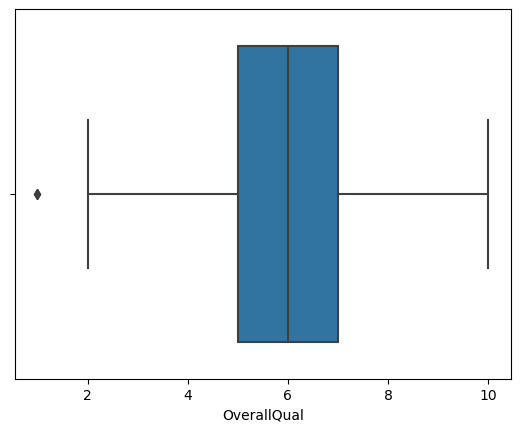

Columna:  19


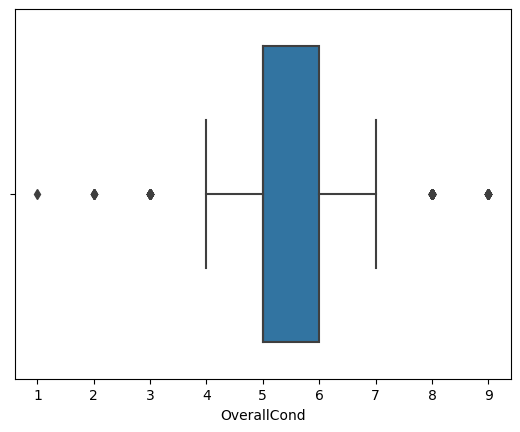

Columna:  20


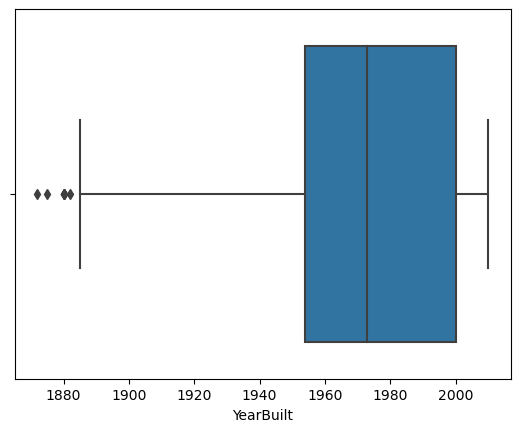

Columna:  21


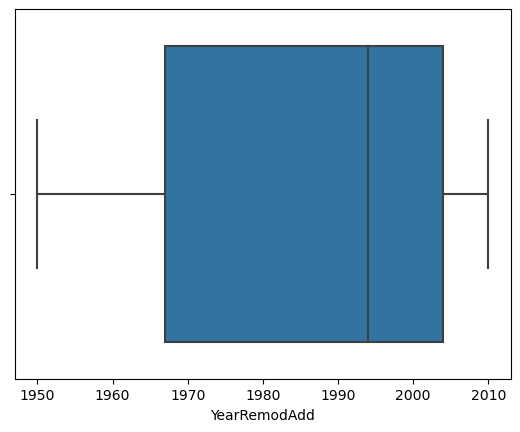

Columna:  22


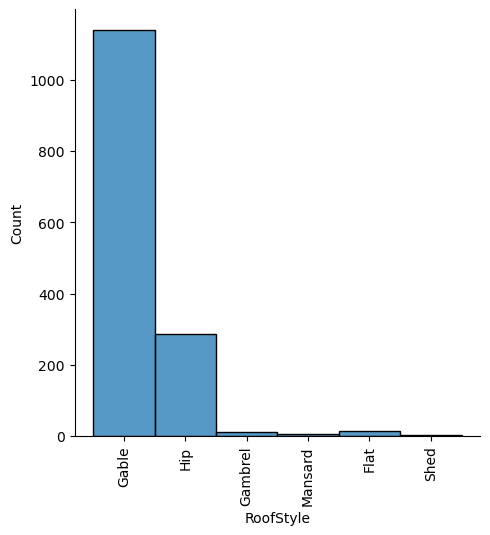

Columna:  23


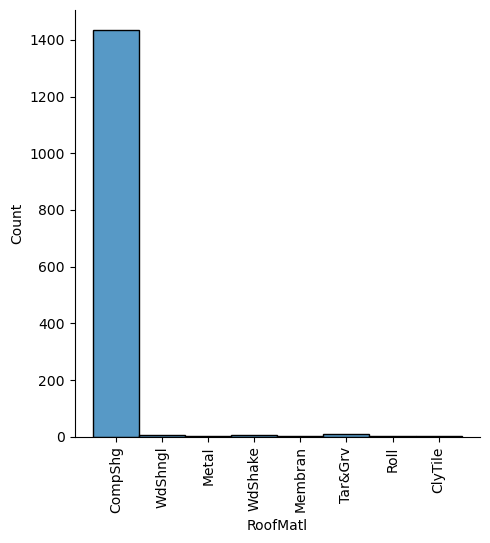

Columna:  24


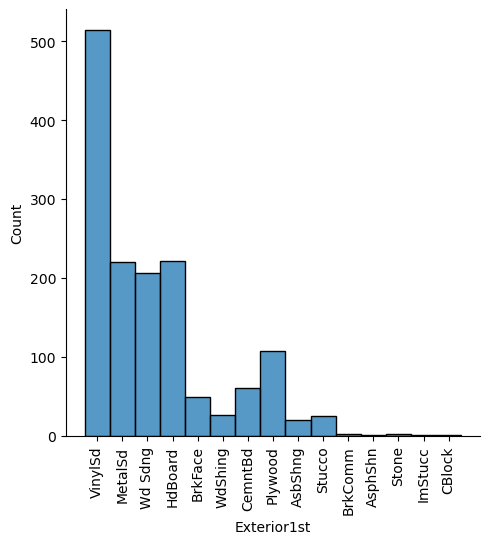

Columna:  25


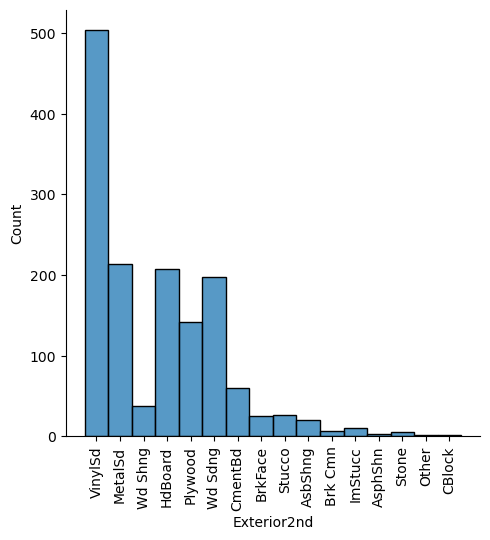

Columna:  26


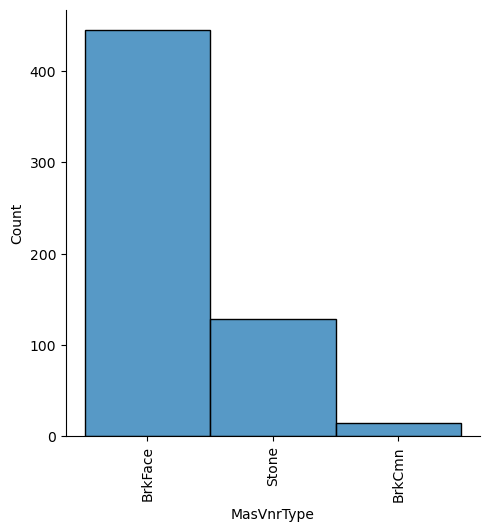

Columna:  27


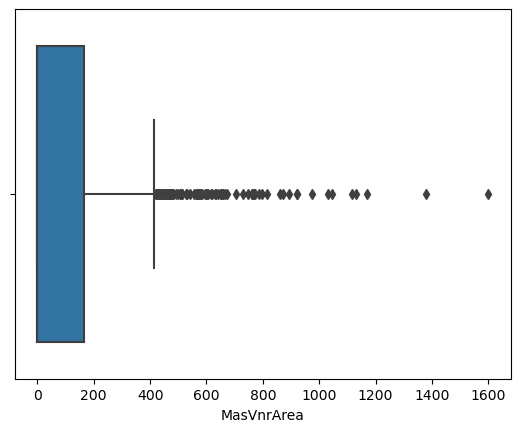

Columna:  28


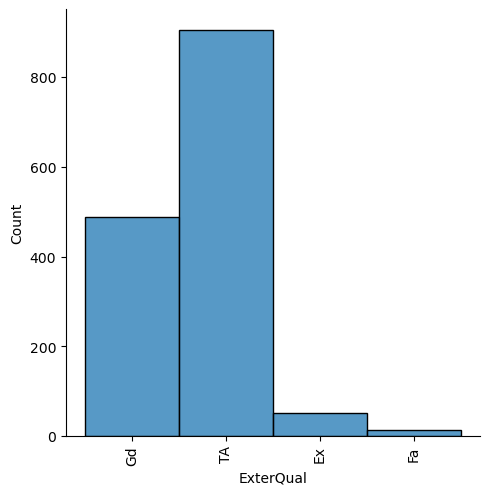

Columna:  29


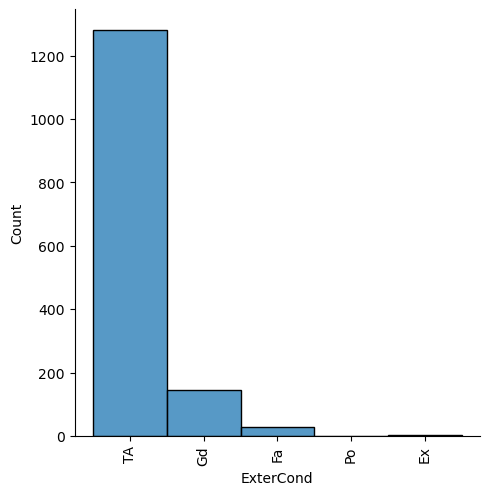

Columna:  30


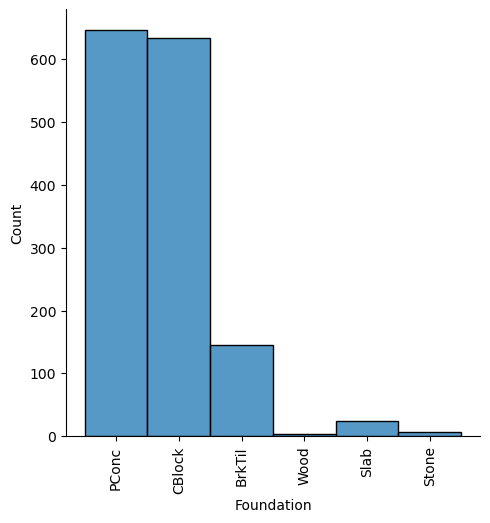

Columna:  31


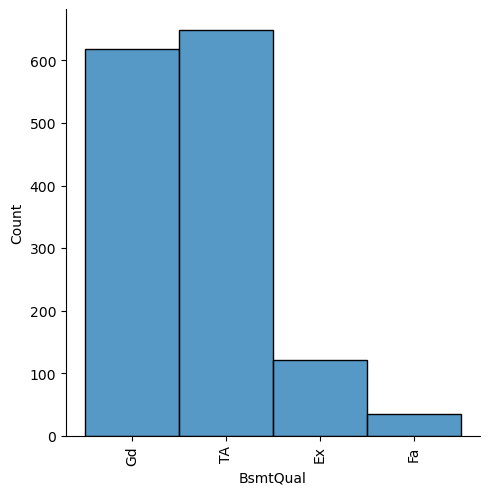

Columna:  32


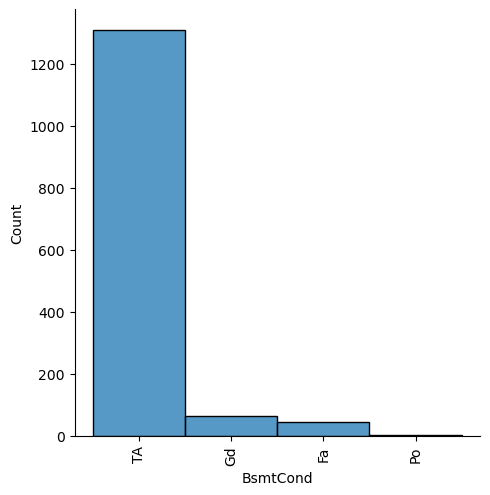

Columna:  33


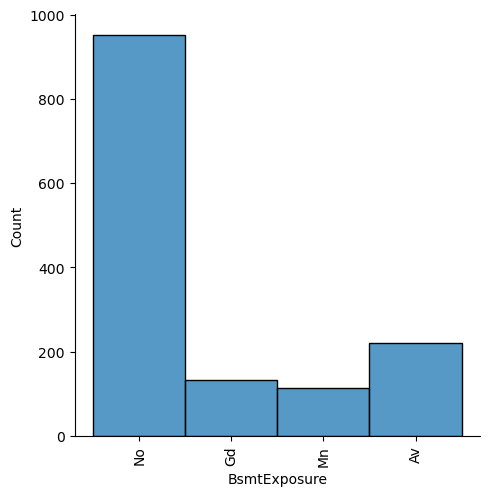

Columna:  34


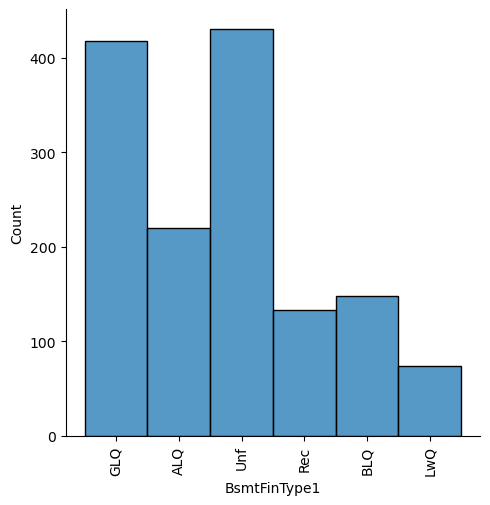

Columna:  35


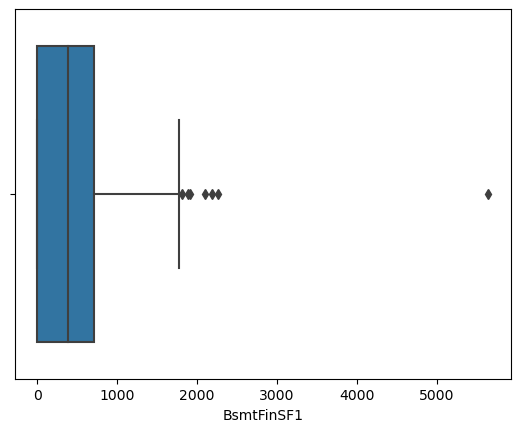

Columna:  36


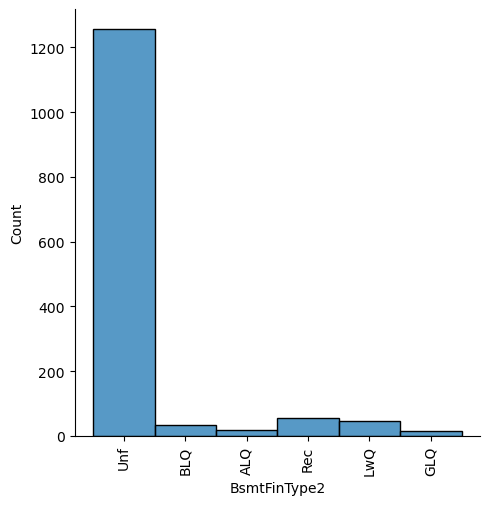

Columna:  37


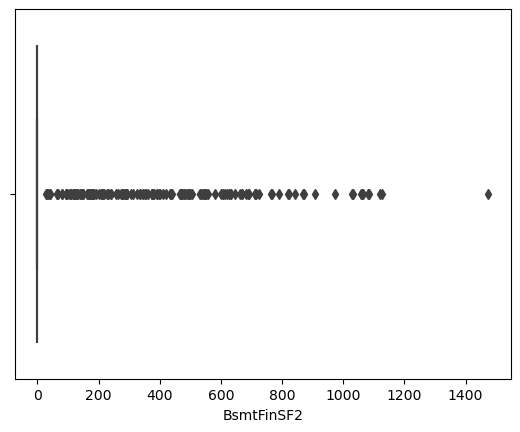

Columna:  38


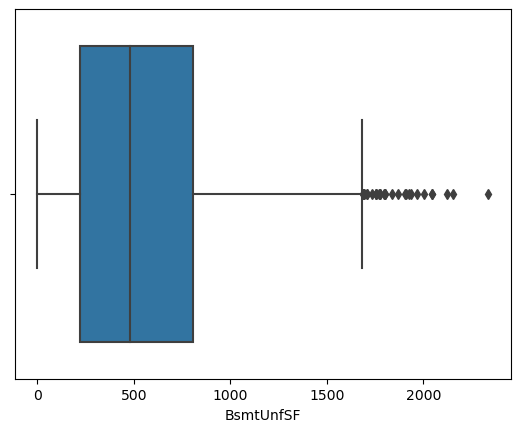

Columna:  39


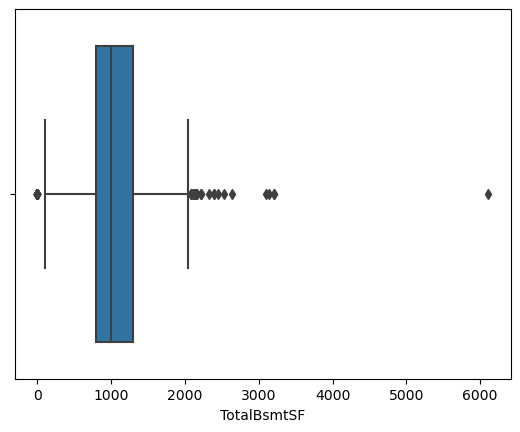

Columna:  40


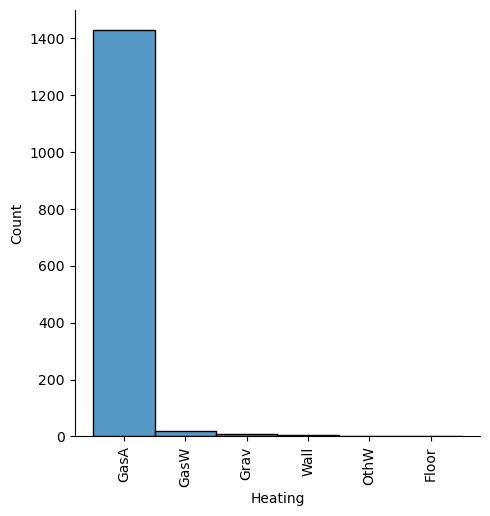

Columna:  41


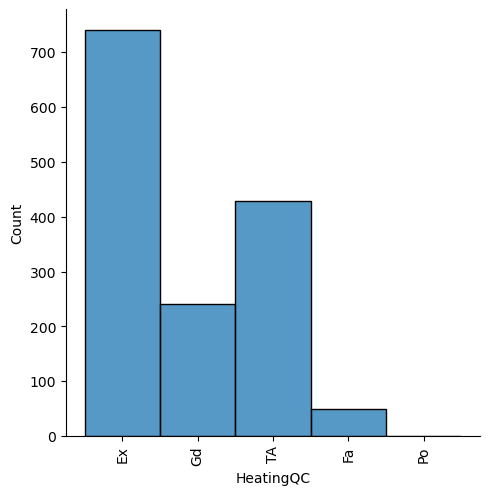

Columna:  42


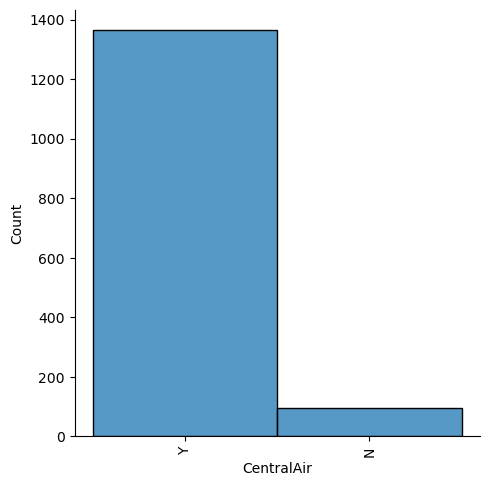

Columna:  43


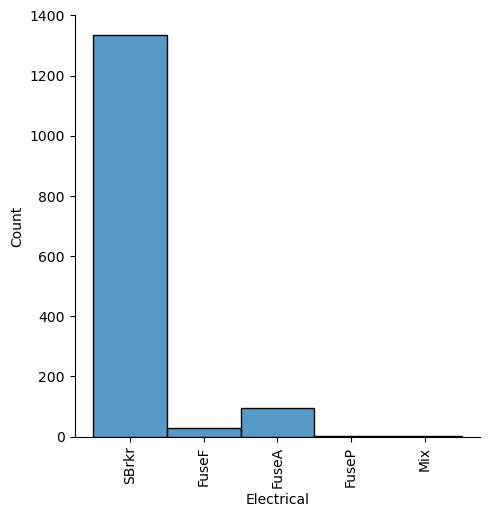

Columna:  44


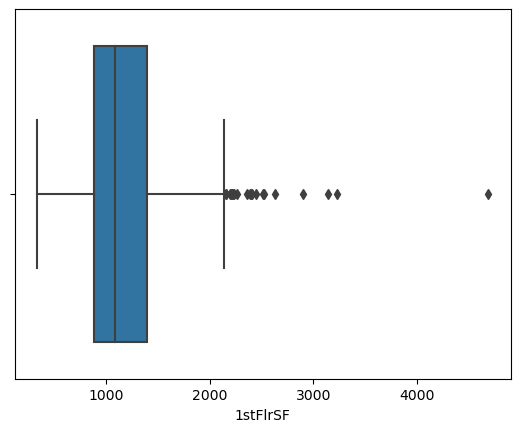

Columna:  45


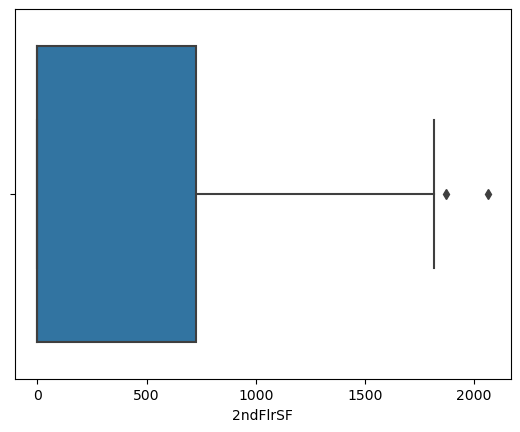

Columna:  46


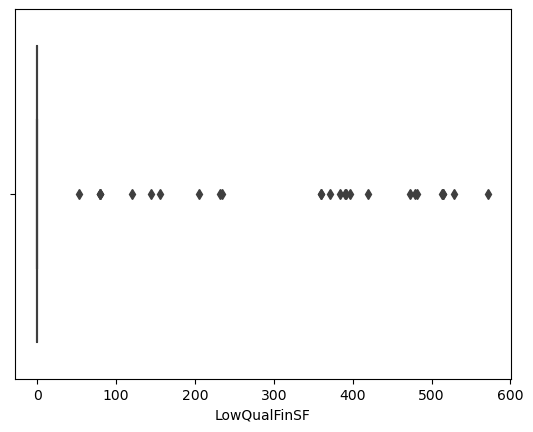

Columna:  47


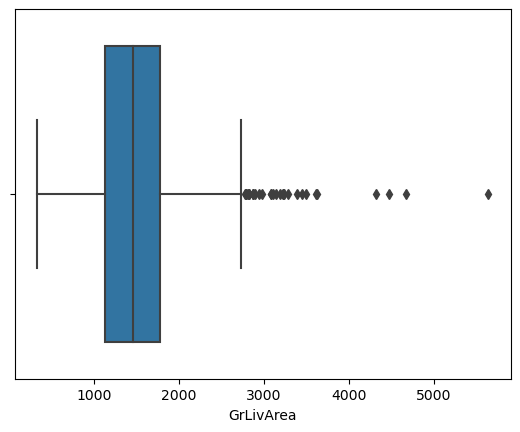

Columna:  48


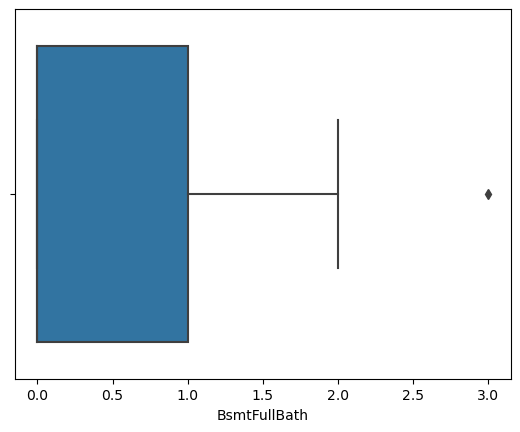

Columna:  49


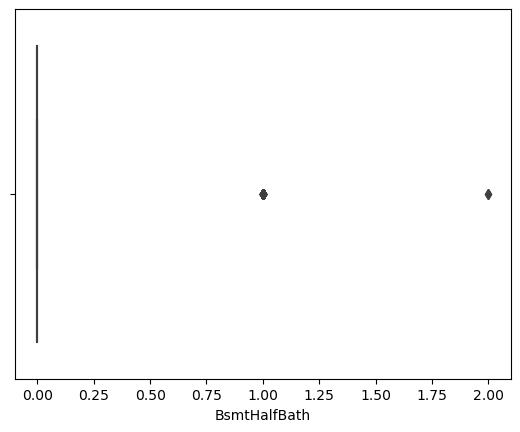

Columna:  50


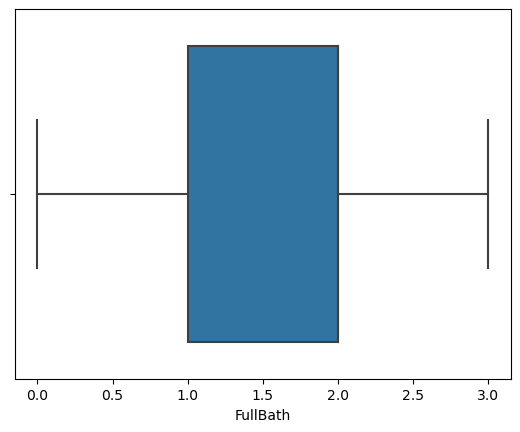

Columna:  51


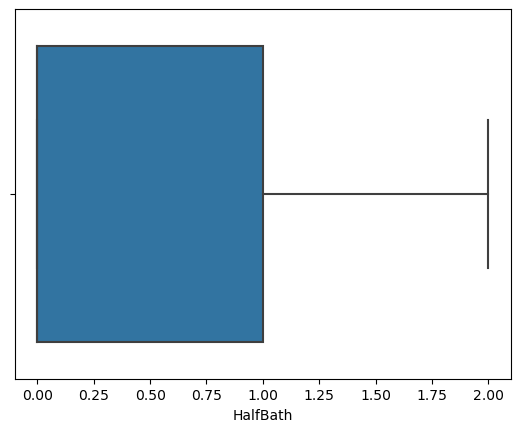

Columna:  52


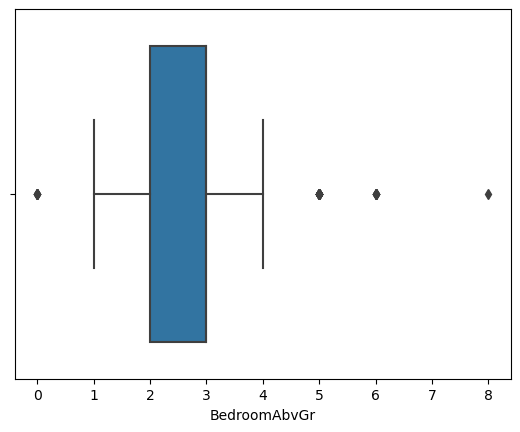

Columna:  53


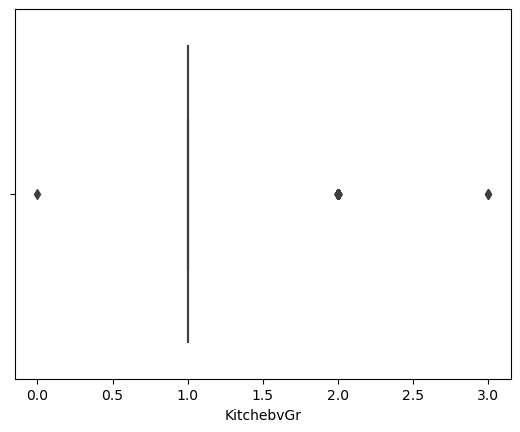

Columna:  54


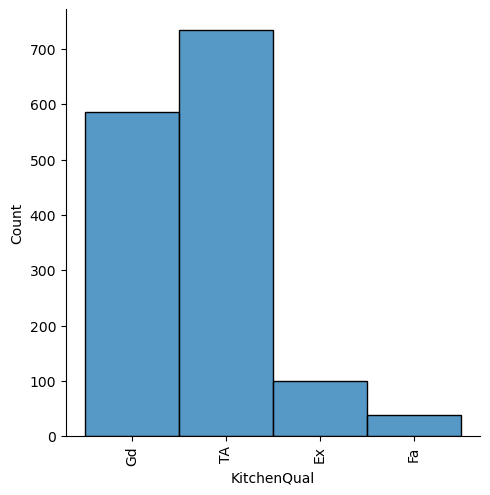

Columna:  55


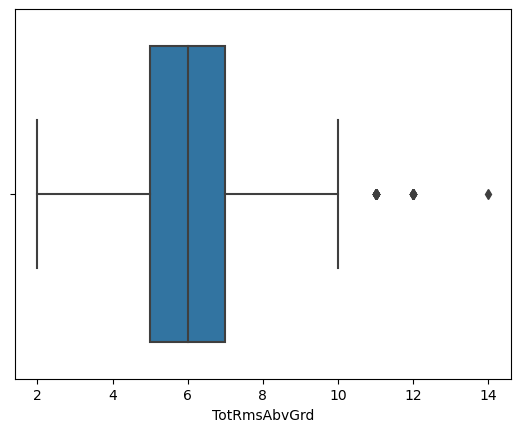

Columna:  56


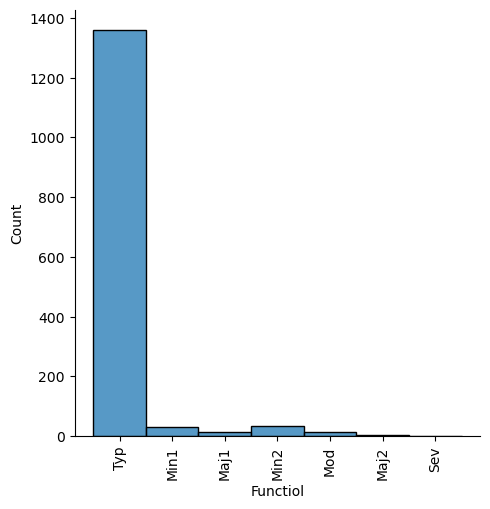

Columna:  57


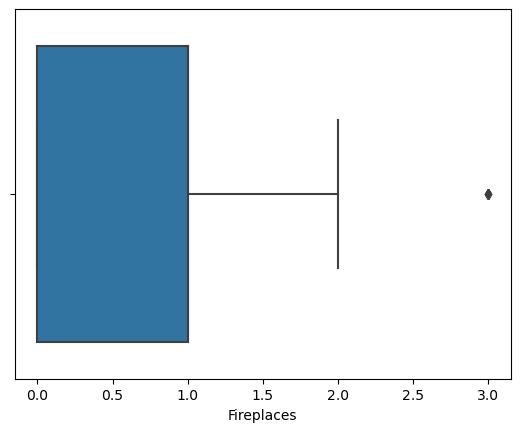

Columna:  58


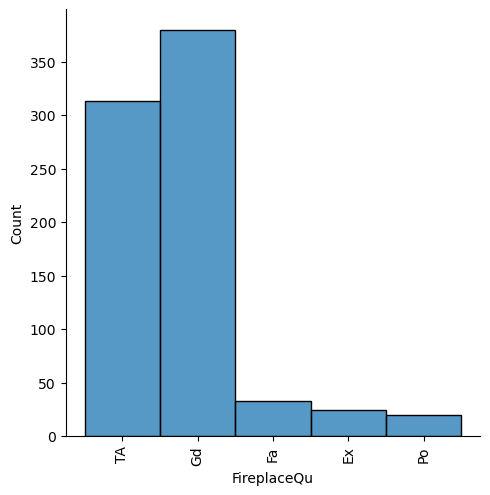

Columna:  59


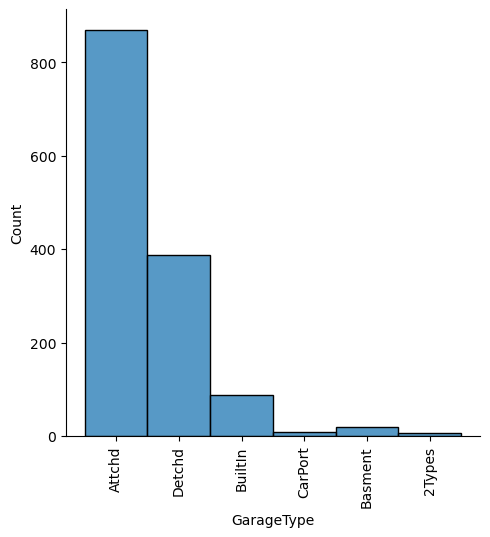

Columna:  60


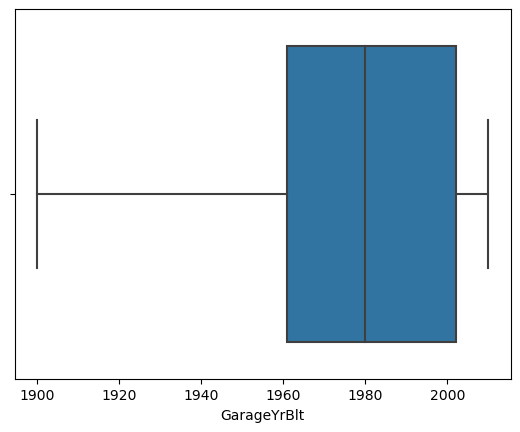

Columna:  61


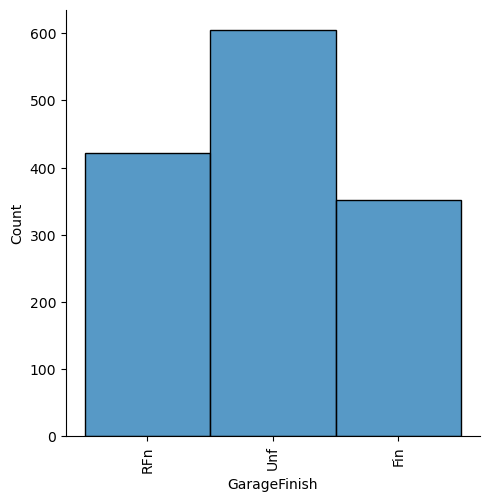

Columna:  62


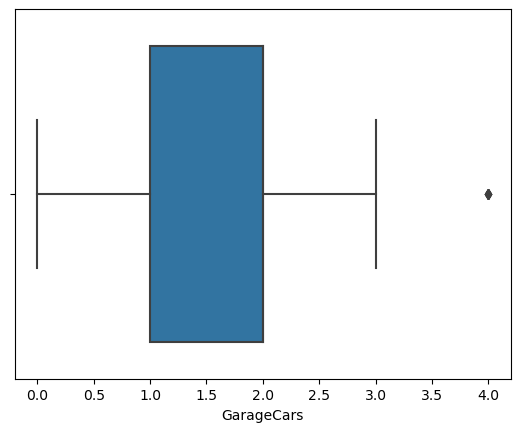

Columna:  63


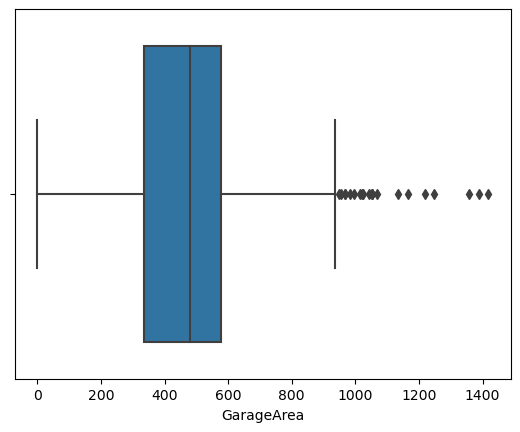

Columna:  64


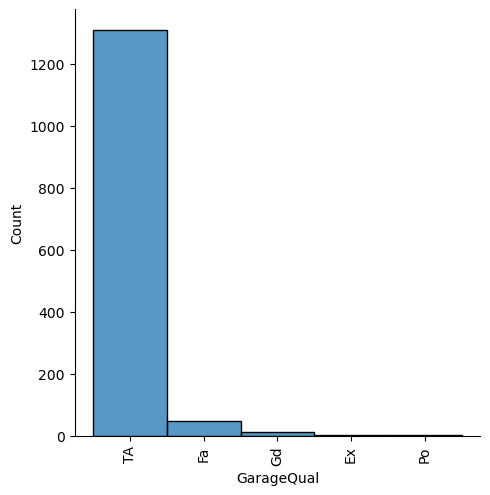

Columna:  65


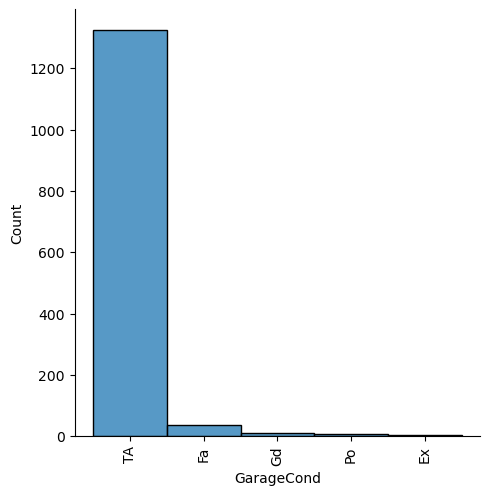

Columna:  66


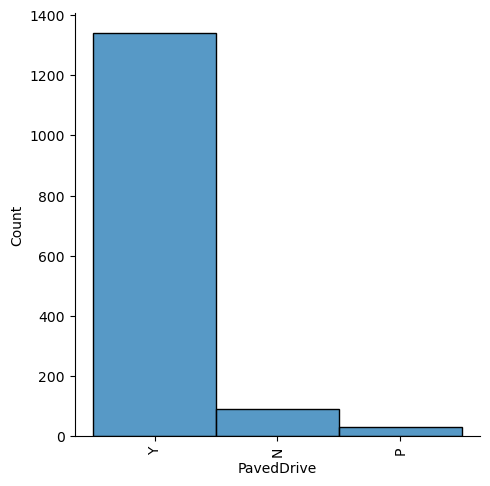

Columna:  67


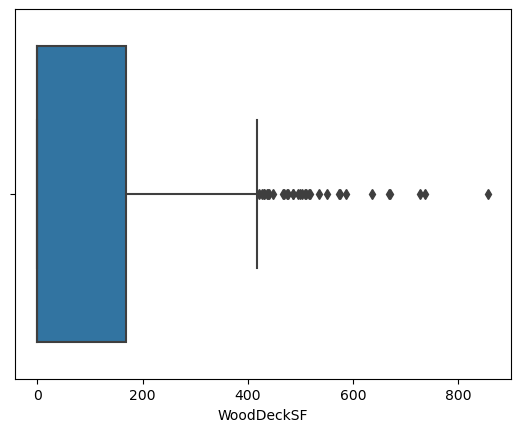

Columna:  68


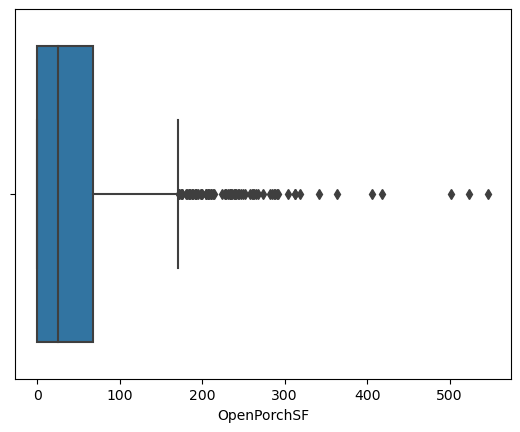

Columna:  69


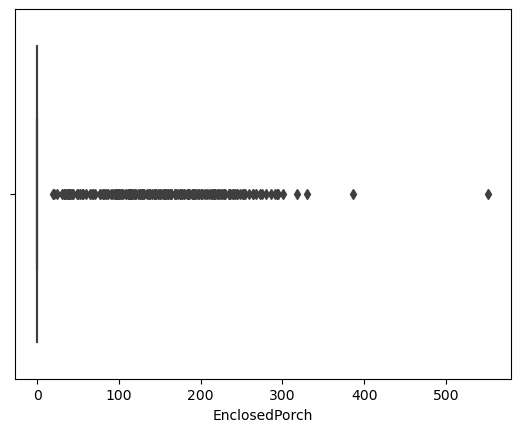

Columna:  70


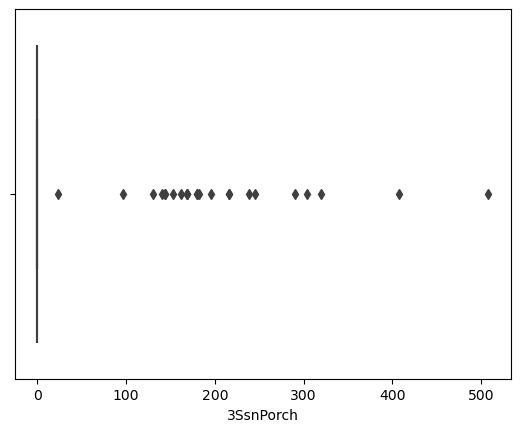

Columna:  71


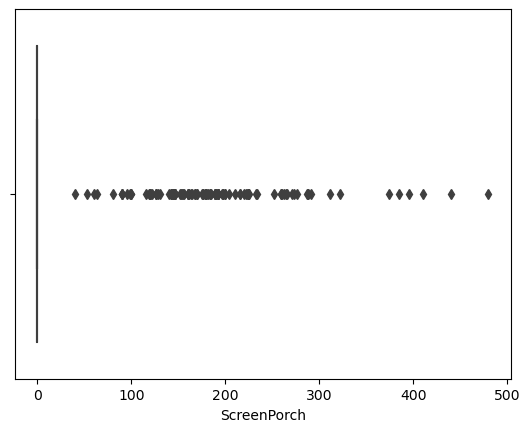

Columna:  72


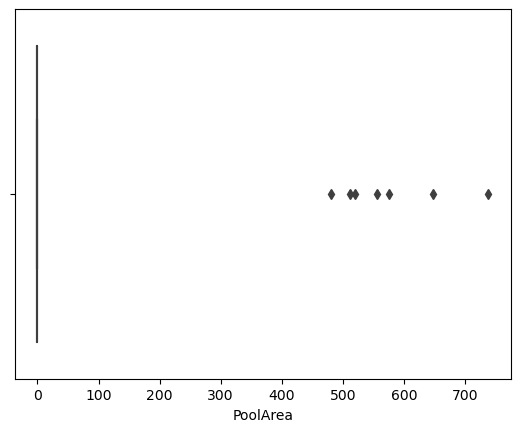

Columna:  73


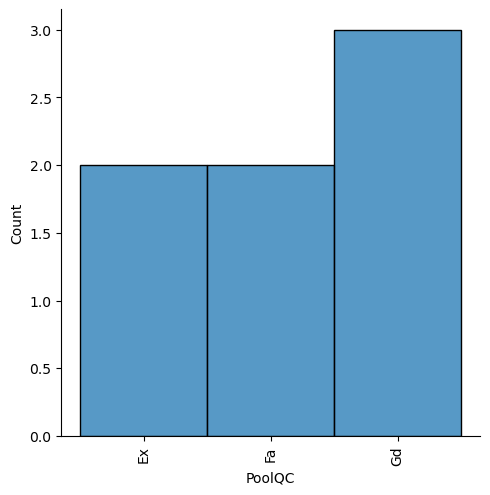

Columna:  74


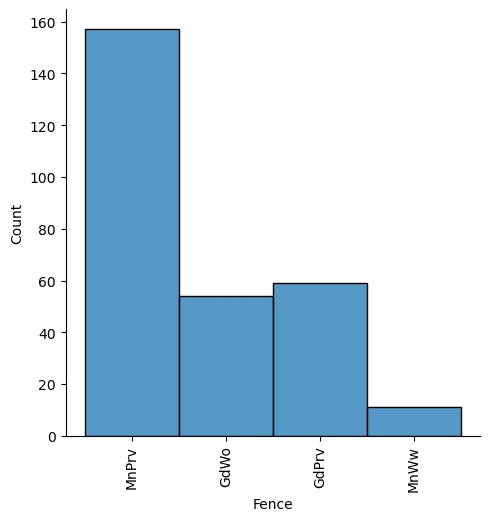

Columna:  75


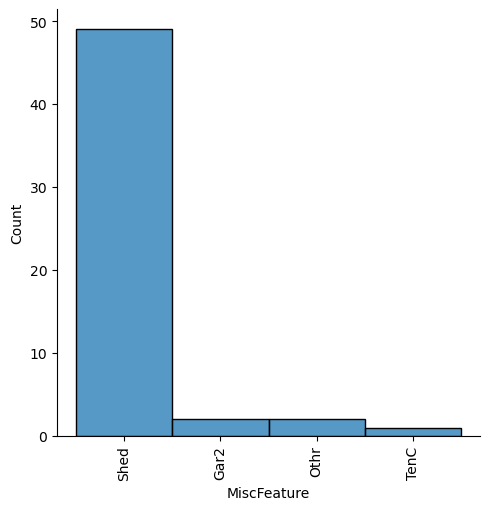

Columna:  76


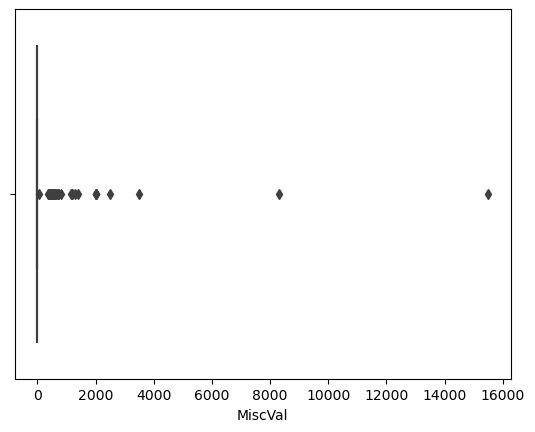

Columna:  77


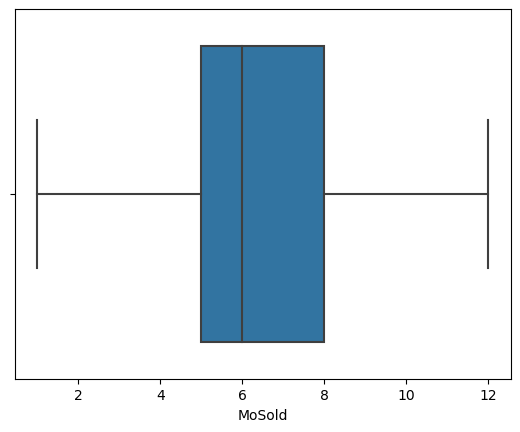

Columna:  78


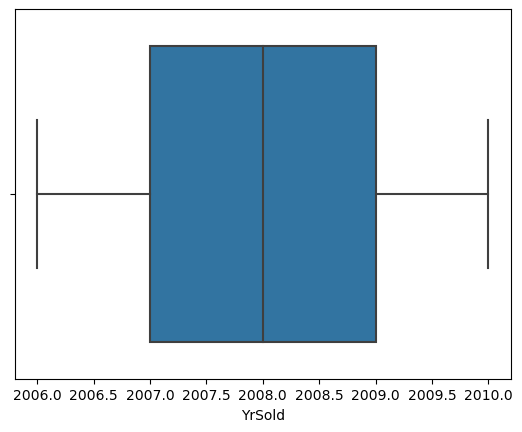

Columna:  79


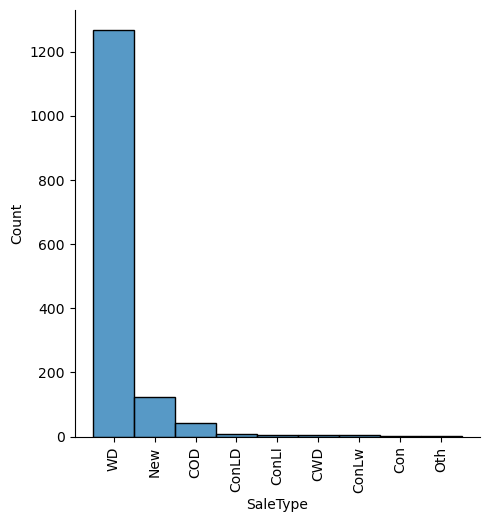

Columna:  80


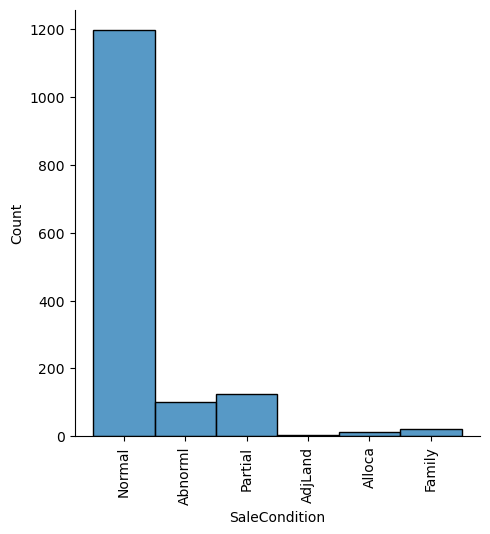

Columna:  81


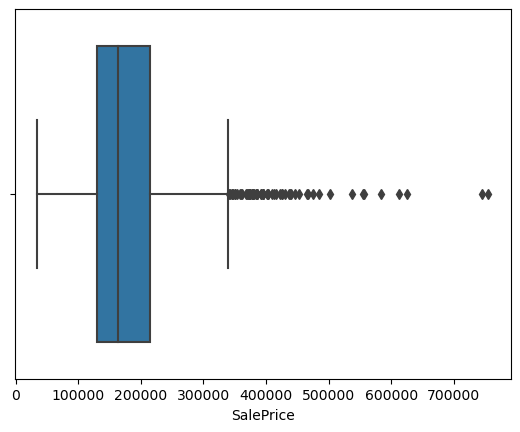

In [13]:
i = 0
for column in df.columns:
    i = i+1
    print("Columna: ", i)
    if (df[column].dtype == "object"):
        sns.displot(data=df, x="{}".format(column), kind="hist")
        plt.xticks(rotation=90)
        plt.show()
    else:
        sns.boxplot(data=df, x="{}".format(column))
        plt.show()


## Tratamiento de los datos.

### Paso 1: Crear un límite para eliminar los datos nulos, mostrar las variables que harán eliminación a sus nulos y mostrar los conteos antes, eliminar los datos nulos y mostrar los conteos de nuevo.

In [14]:
# El límite será del 5%
print("El límite de 5% equivale a: ", df.shape[0]*0.05, " filas.")

print("Las variables que harán eliminación a sus nulos son:")
df.columns[df.isna().sum() <= (df.shape[0]*0.05)]

El límite de 5% equivale a:  73.0  filas.
Las variables que harán eliminación a sus nulos son:


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functiol', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
     

In [15]:
#Conteo antes de eliminación
total = 0
for columna in df.columns:
    print(columna, df[columna].isna().sum())
    total = total + df[columna].isna().sum()
print("total de nulos: ", total)

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchebvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functiol 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSold 

In [16]:
# Eliminación de los datos nulos
columnas_a_eliminar = df.columns[df.isna().sum() <= (df.shape[0]*0.05)]
df = df.dropna(subset=columnas_a_eliminar)

In [17]:
#Conteo después de eliminación
total = 0
for columna in df.columns:
    print(columna, df[columna].isna().sum())
    total = total + df[columna].isna().sum()
print("total de nulos: ", total)

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 251
LotArea 0
Street 0
Alley 1323
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 831
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchebvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functiol 0
Fireplaces 0
FireplaceQu 657
GarageType 74
GarageYrBlt 74
GarageFinish 74
GarageCars 0
GarageArea 0
GarageQual 74
GarageCond 74
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1405
Fence 1135
MiscFeature 1361
MiscVal 0
MoSold 0
YrSold 0
Sal

<p style="color:blue;">
    Existen unas columnas que tienen una gran cantidad de valores nulos, por lo que me gustaría eliminar algunas que considero, pueden ser prescindibles:    
    
• PoolQC: Solo tiene 7 valores no nulos y ya existe otra columna que hace referencia a las piscinas: “PoolArea”.    
    
• MasVnrType: Hace relación al tipo de mampostería y a mi consideración, debido a que ya existe una columna que contiene el área, esta puede ser ignorada.    
    
• Alley: Al tener tantos valores nulos considero que es mejor eliminar la columna.    
    
• Fence: Al tener tantos valores nulos me da a entender que no es muy significativa al momento de calcular el precio de venta.    
    
• MiscFeature: A pesar de que tiene datos importantes, al tener tan pocos registros con valores, considero que lo mejor es eliminar toda la columna.    
    
</p>

In [18]:
df.drop(['PoolQC', 'MasVnrType', 'Alley', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [19]:
# Revisión después de eliminar columnas.
total = 0
for columna in df.columns:
    print(columna, df[columna].isna().sum(), df[columna].dtype)
    total = total + df[columna].isna().sum()
print("total de nulos: ", total)

Id 0 int64
MSSubClass 0 int64
MSZoning 0 object
LotFrontage 251 float64
LotArea 0 int64
Street 0 object
LotShape 0 object
LandContour 0 object
Utilities 0 object
LotConfig 0 object
LandSlope 0 object
Neighborhood 0 object
Condition1 0 object
Condition2 0 object
BldgType 0 object
HouseStyle 0 object
OverallQual 0 int64
OverallCond 0 int64
YearBuilt 0 int64
YearRemodAdd 0 int64
RoofStyle 0 object
RoofMatl 0 object
Exterior1st 0 object
Exterior2nd 0 object
MasVnrArea 0 float64
ExterQual 0 object
ExterCond 0 object
Foundation 0 object
BsmtQual 0 object
BsmtCond 0 object
BsmtExposure 0 object
BsmtFinType1 0 object
BsmtFinSF1 0 int64
BsmtFinType2 0 object
BsmtFinSF2 0 int64
BsmtUnfSF 0 int64
TotalBsmtSF 0 int64
Heating 0 object
HeatingQC 0 object
CentralAir 0 object
Electrical 0 object
1stFlrSF 0 int64
2ndFlrSF 0 int64
LowQualFinSF 0 int64
GrLivArea 0 int64
BsmtFullBath 0 int64
BsmtHalfBath 0 int64
FullBath 0 int64
HalfBath 0 int64
BedroomAbvGr 0 int64
KitchebvGr 0 int64
KitchenQual 0 object

### Paso 2: Si existen nulos aún, dependiendo de la gráficas anteriores, determinar si hay que imputar por medio de la moda, la mediana o la media; realizar la imputación.

In [20]:
# Lista de elementos con nulos
total = 0
for columna in df.columns:
    if (df[columna].isna().sum() > 0):
        print(columna, df[columna].isna().sum(), df[columna].dtype)
    total = total + df[columna].isna().sum()
print("total de nulos: ", total)

LotFrontage 251 float64
FireplaceQu 657 object
GarageType 74 object
GarageYrBlt 74 float64
GarageFinish 74 object
GarageQual 74 object
GarageCond 74 object
total de nulos:  1278


<p style="color:blue;">
    Para las columnas de tipo objeto utilizaré la moda. Para el caso de ‘LotFrontage’ que tiene valores atípicos se imputará con la mediana y para las columnas de tipo float con menos nulos se utilizará la media.
</p>

In [21]:
valores_nulos = df.isnull()
columnas_con_nulos = valores_nulos.any()
columnas_con_valores_nulos = columnas_con_nulos[columnas_con_nulos].index

for columna in columnas_con_valores_nulos:
    if (df[columna].dtype == "object"):
        moda = df[columna].mode()[0]
        df[columna].fillna(value=moda, inplace=True)
    if (df[columna].dtype == "float64"):
        if (df[columna].isna().sum() > 200):
            mediana = df[columna].median()
            df[columna].fillna(value=mediana, inplace=True)
        else:
            media = df[columna].mean()
            df[columna].fillna(value=media, inplace=True)

In [22]:
# Lista sin nulos
total = 0
for columna in df.columns:
    if (df[columna].isna().sum() > 0):
        print(columna, df[columna].isna().sum(), df[columna].dtype)
    total = total + df[columna].isna().sum()
print("total de nulos: ", total)

total de nulos:  0


### Paso 3: Analizar los datos numéricos, determinar si hay anomalías y utilizar el rango intercuartílico para tratarlos, mostrar gráficos antes y después del tratamiento, debe verse si la distribución se vio afectada.

Id : No tiene datos anomalos

MSSubClass : Debe tratarse.
Antes:


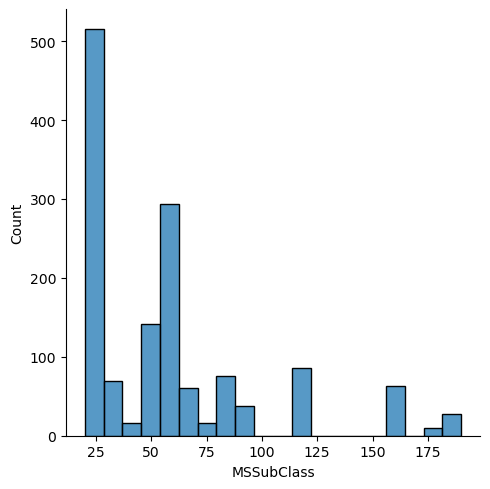

Despues:


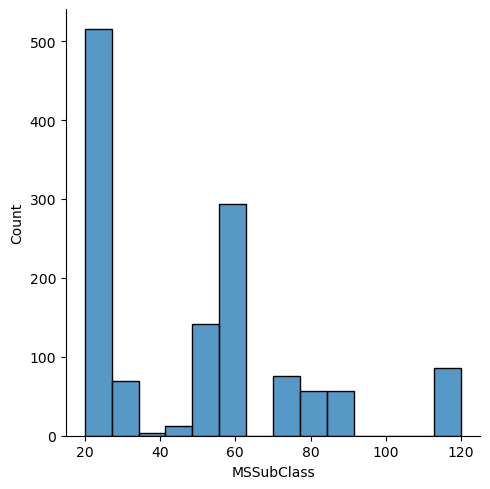

LotFrontage : Debe tratarse.
Antes:


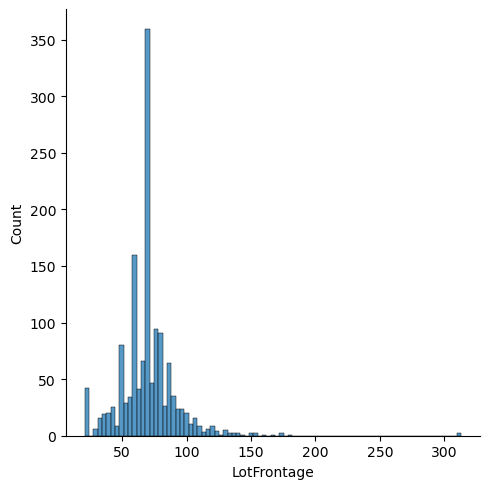

Despues:


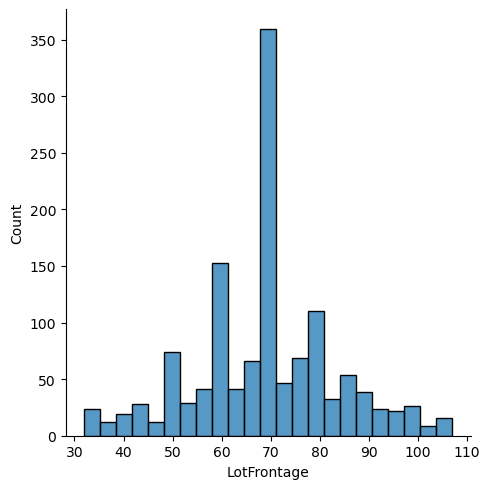

LotArea : Debe tratarse.
Antes:


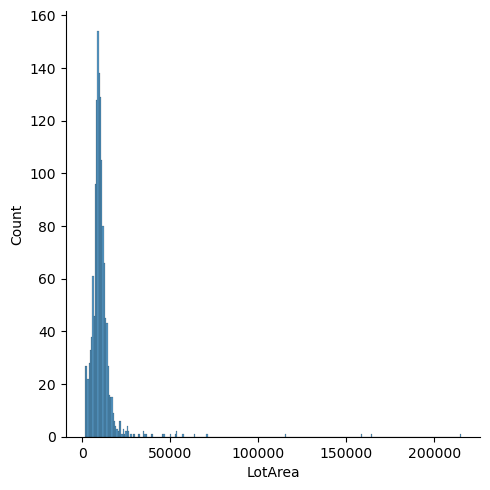

Despues:


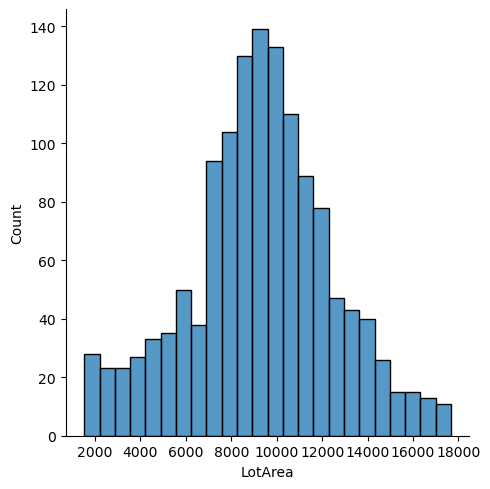

OverallQual : Debe tratarse.
Antes:


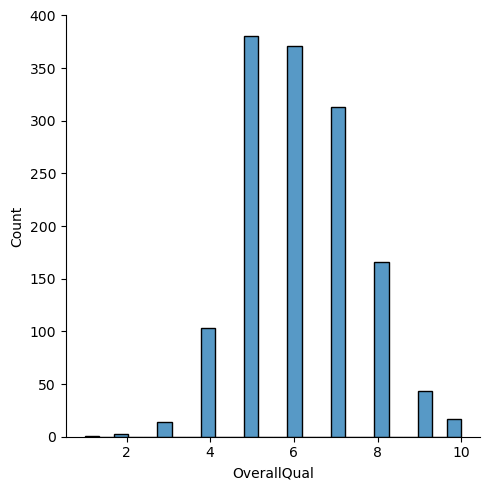

Despues:


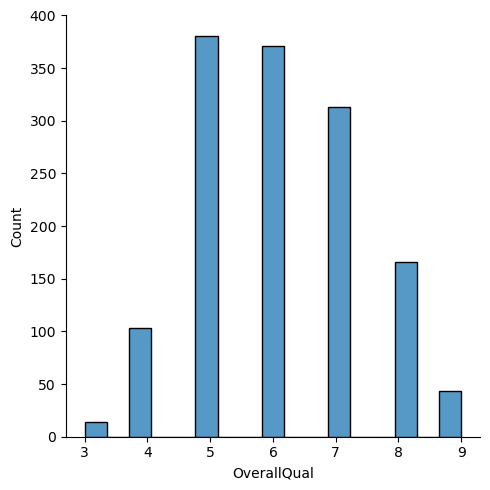

OverallCond : Debe tratarse.
Antes:


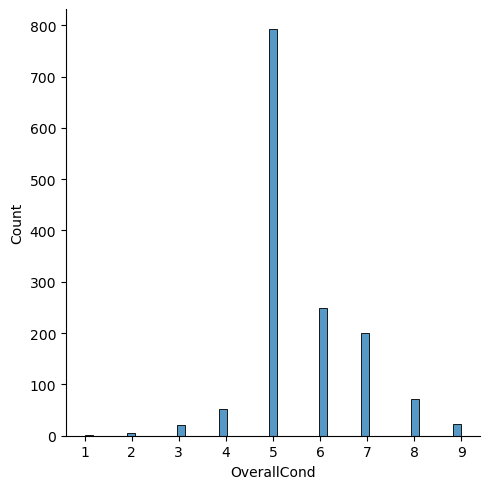

Despues:


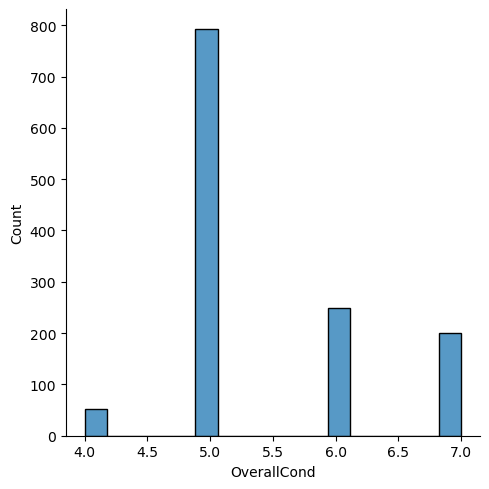

YearBuilt : Debe tratarse.
Antes:


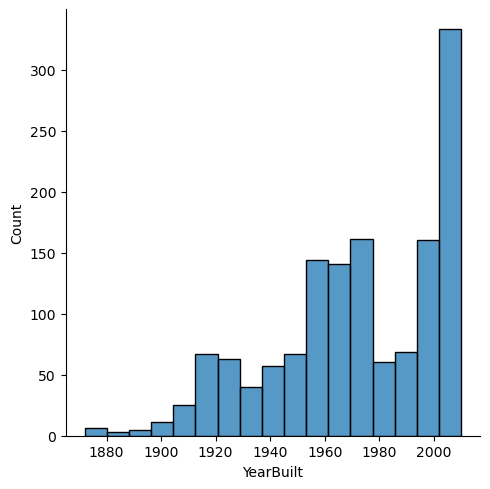

Despues:


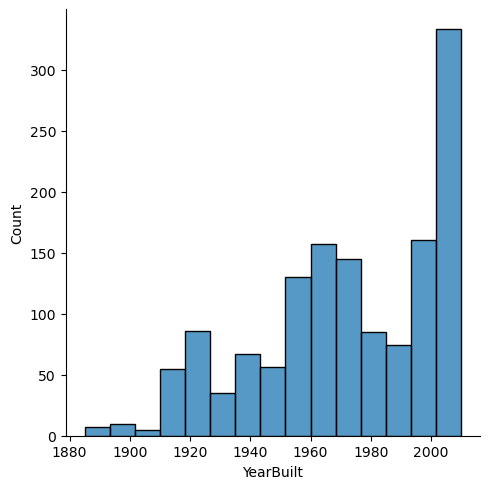

YearRemodAdd : No tiene datos anomalos

MasVnrArea : Debe tratarse.
Antes:


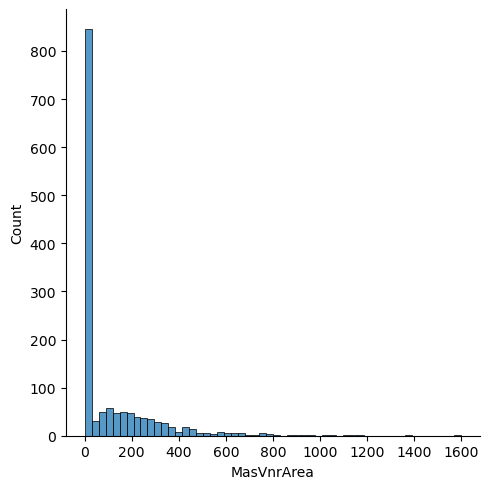

Despues:


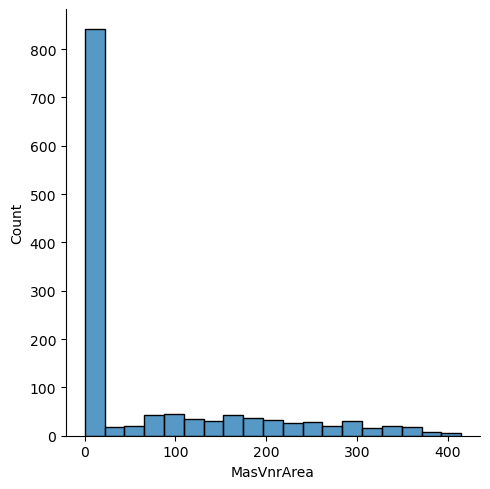

BsmtFinSF1 : Debe tratarse.
Antes:


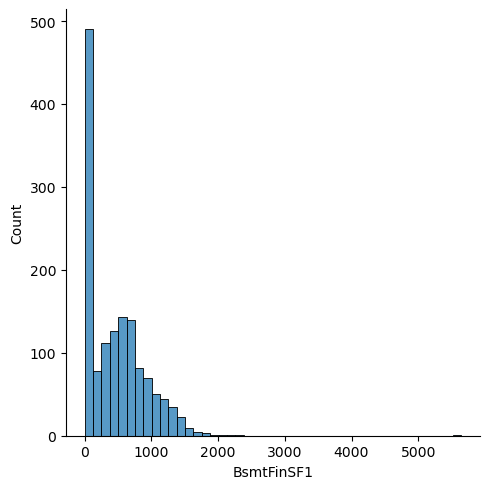

Despues:


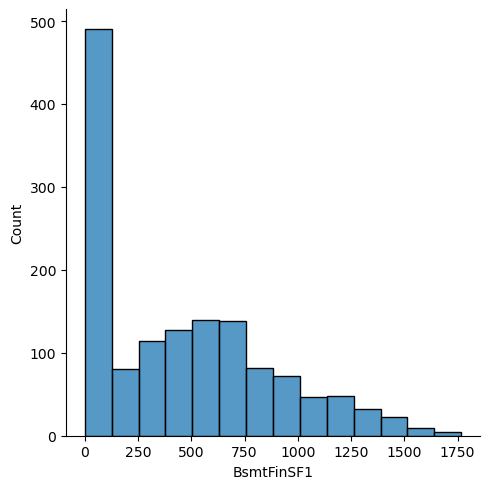

BsmtFinSF2 : Debe tratarse.
Antes:


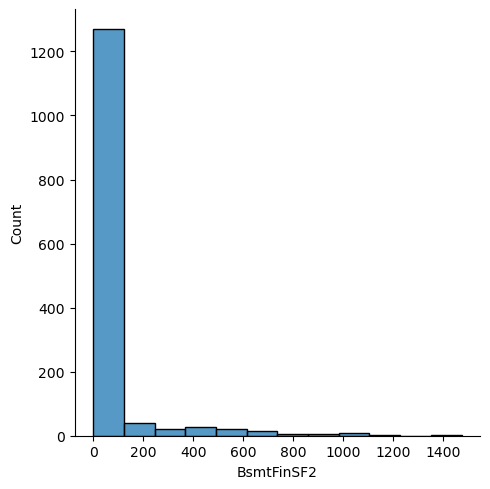

Despues:


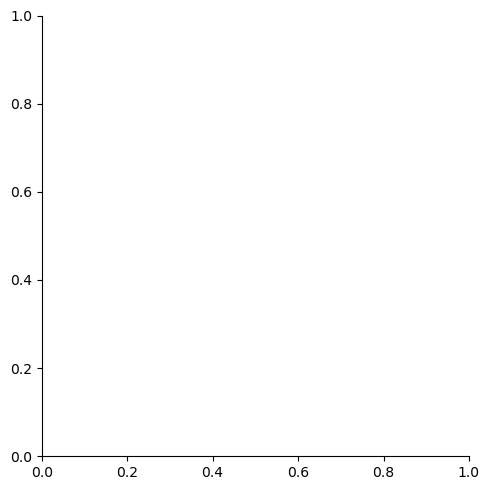

BsmtUnfSF : Debe tratarse.
Antes:


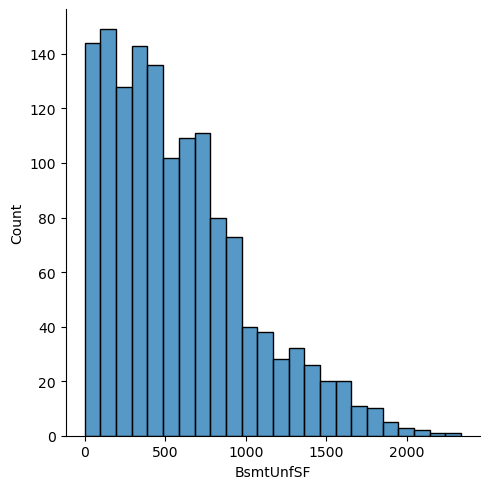

Despues:


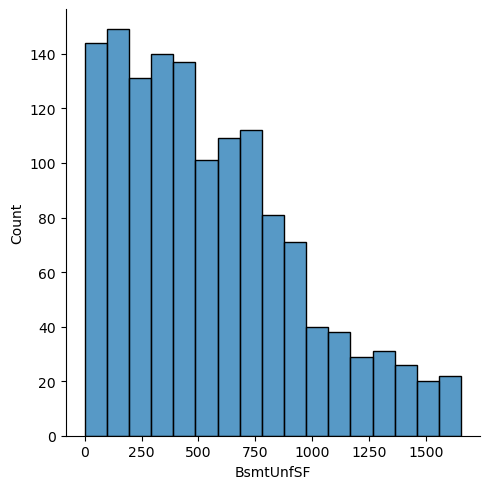

TotalBsmtSF : Debe tratarse.
Antes:


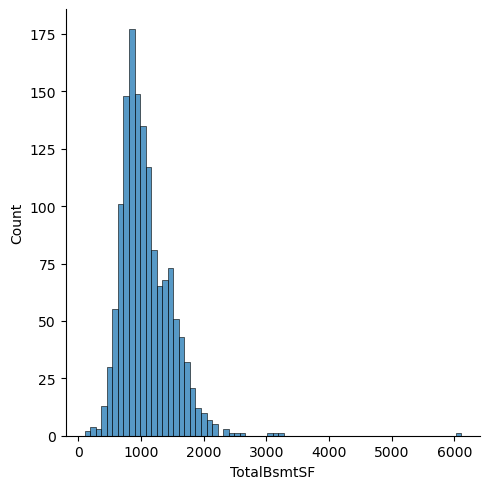

Despues:


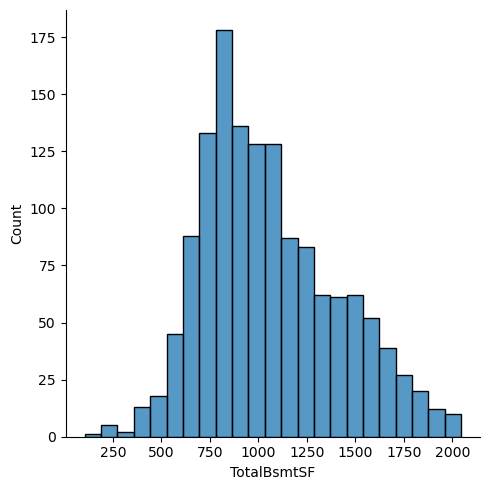

1stFlrSF : Debe tratarse.
Antes:


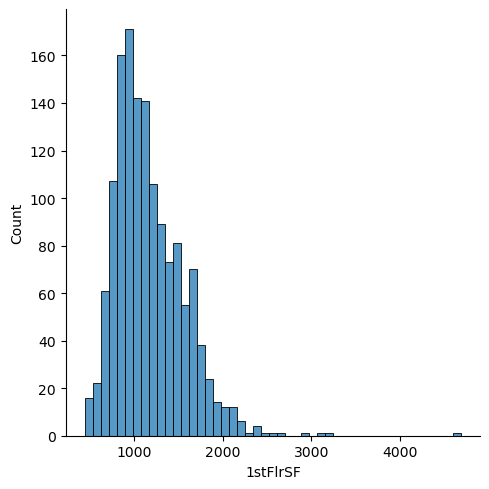

Despues:


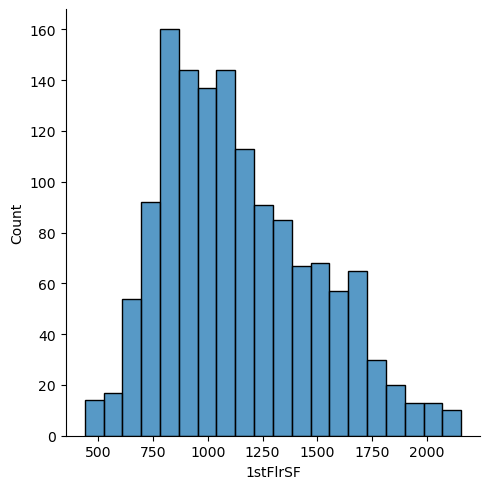

2ndFlrSF : Debe tratarse.
Antes:


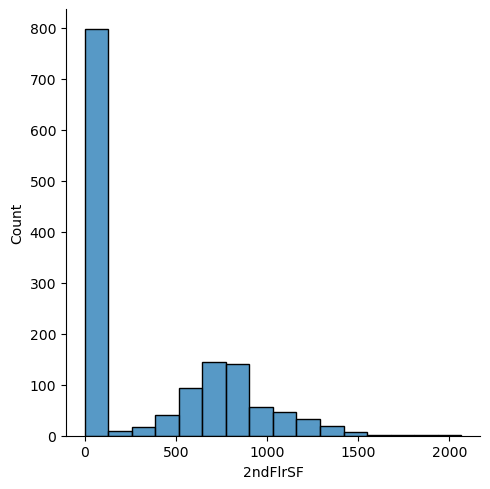

Despues:


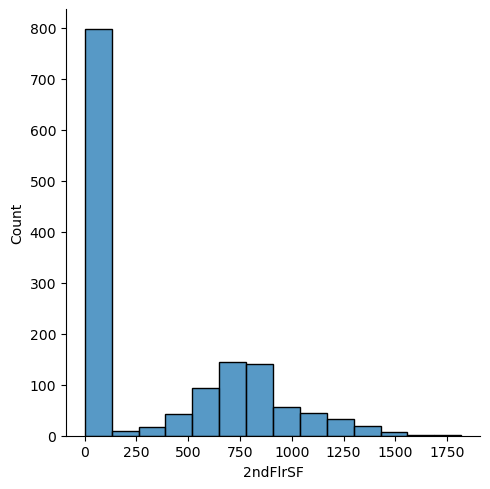

LowQualFinSF : Debe tratarse.
Antes:


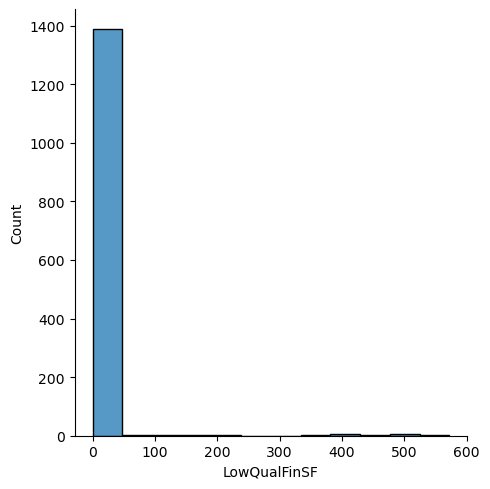

Despues:


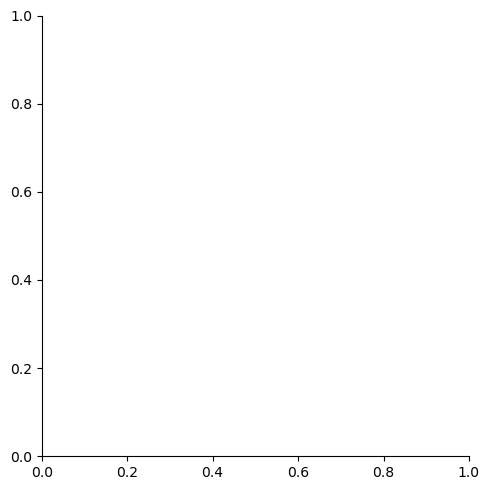

GrLivArea : Debe tratarse.
Antes:


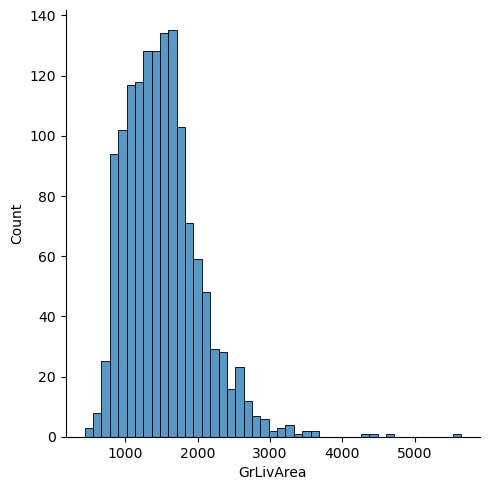

Despues:


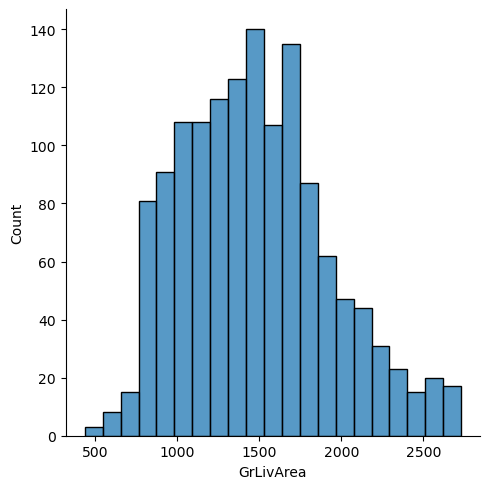

BsmtFullBath : Debe tratarse.
Antes:


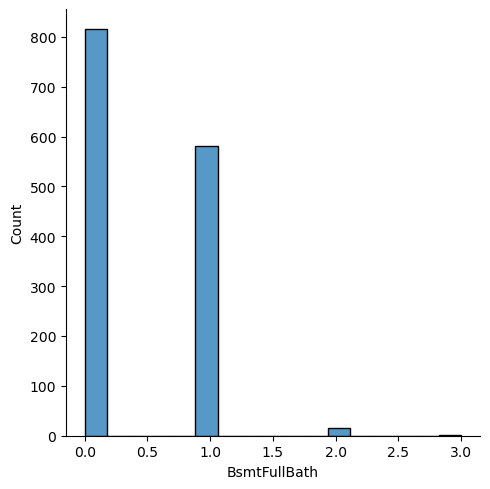

Despues:


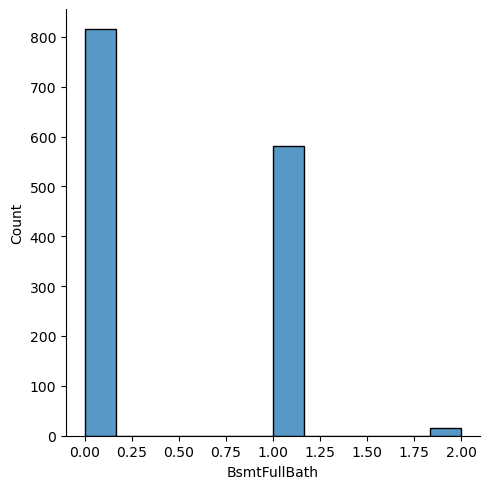

BsmtHalfBath : Debe tratarse.
Antes:


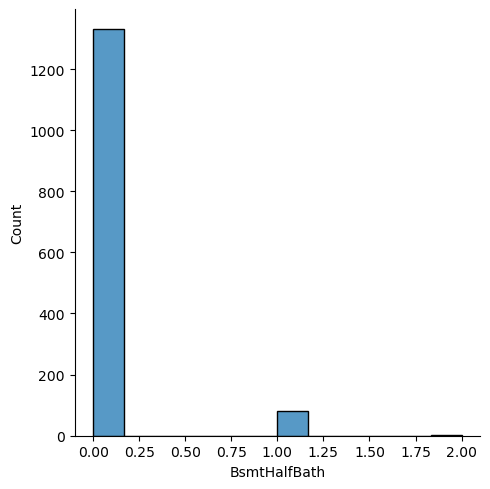

Despues:


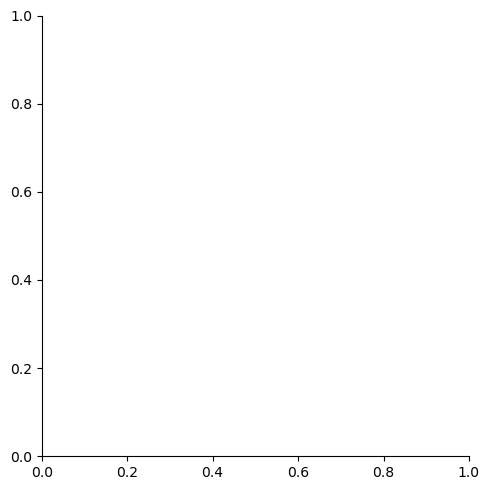

FullBath : No tiene datos anomalos

HalfBath : No tiene datos anomalos

BedroomAbvGr : Debe tratarse.
Antes:


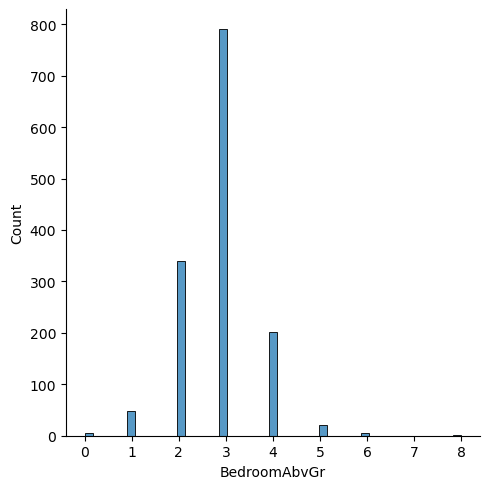

Despues:


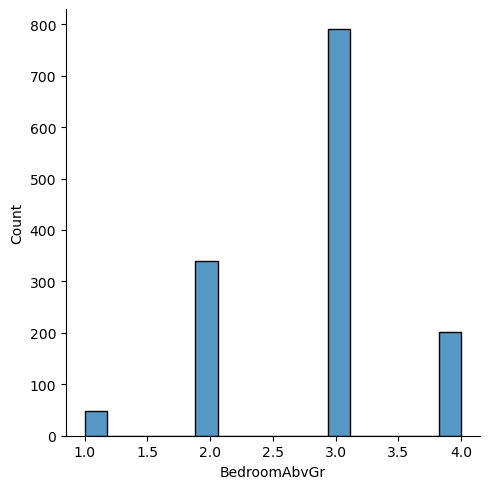

KitchebvGr : Debe tratarse.
Antes:


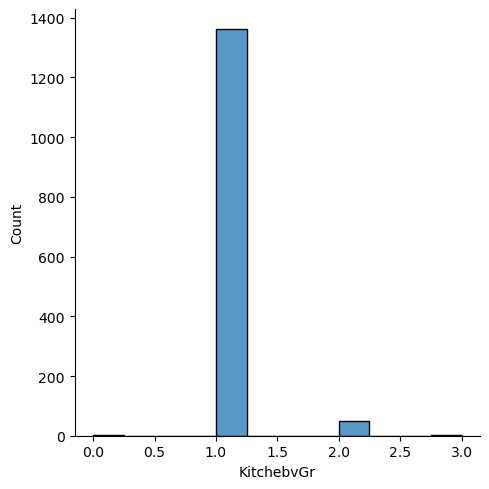

Despues:


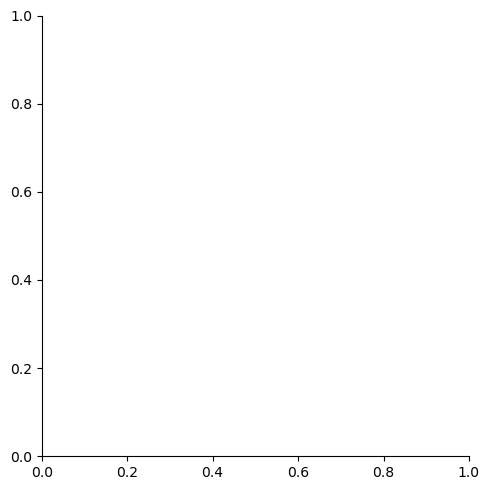

TotRmsAbvGrd : Debe tratarse.
Antes:


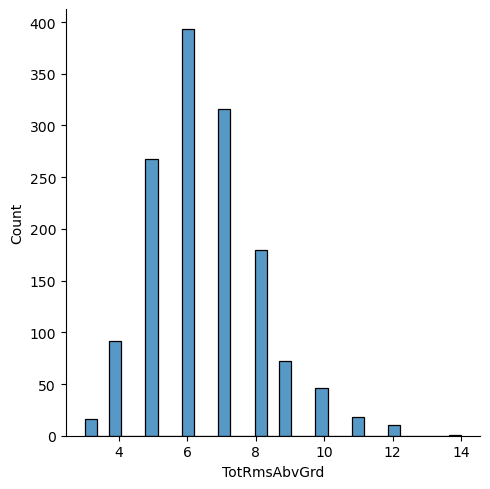

Despues:


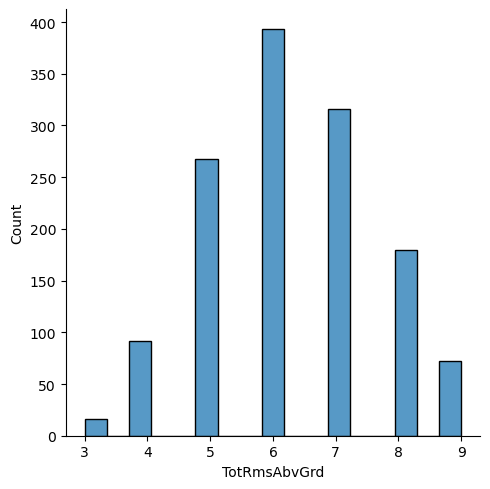

Fireplaces : Debe tratarse.
Antes:


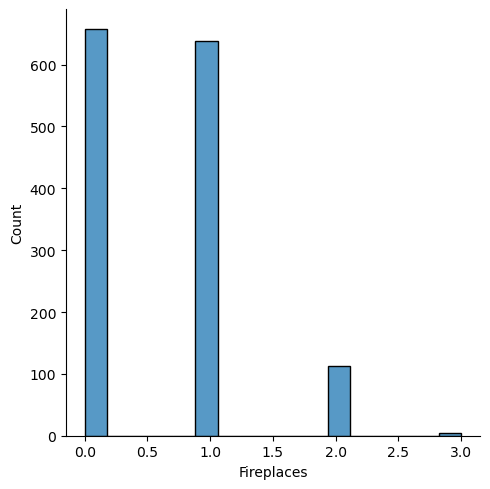

Despues:


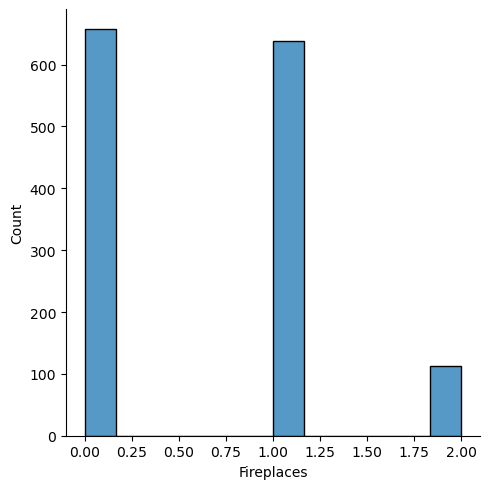

GarageYrBlt : Debe tratarse.
Antes:


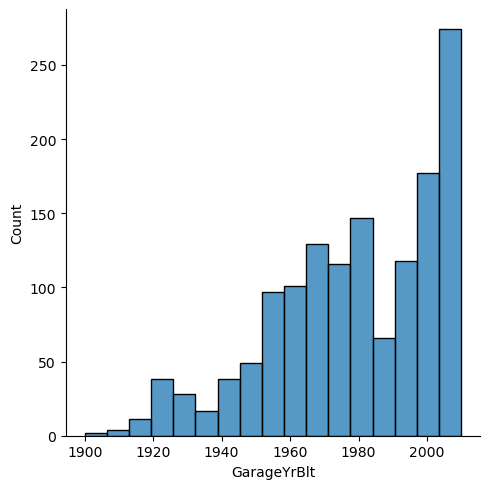

Despues:


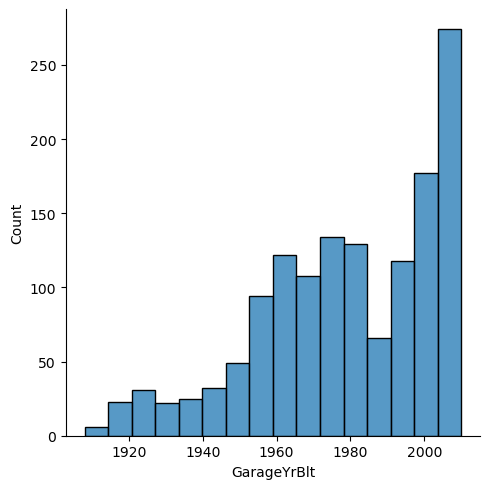

GarageCars : Debe tratarse.
Antes:


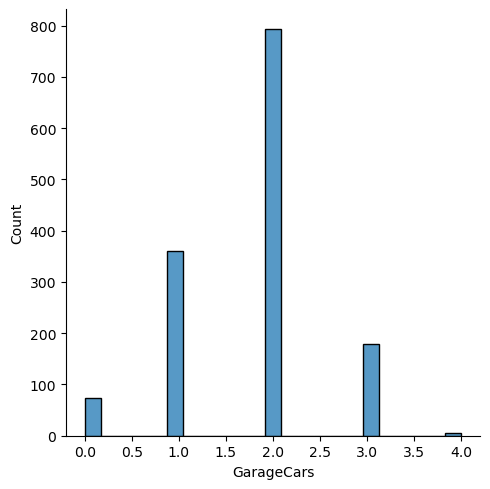

Despues:


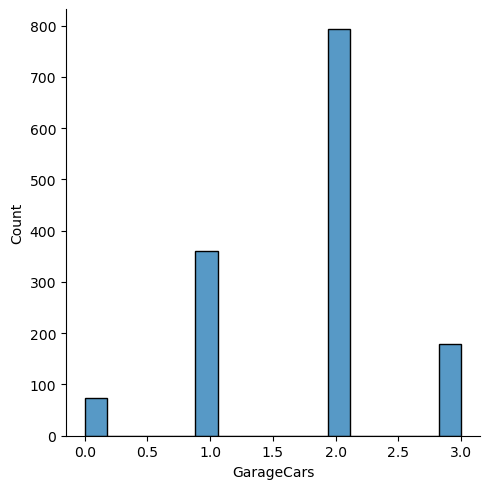

GarageArea : Debe tratarse.
Antes:


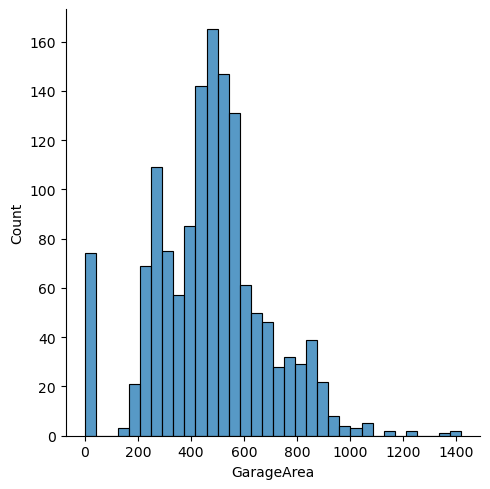

Despues:


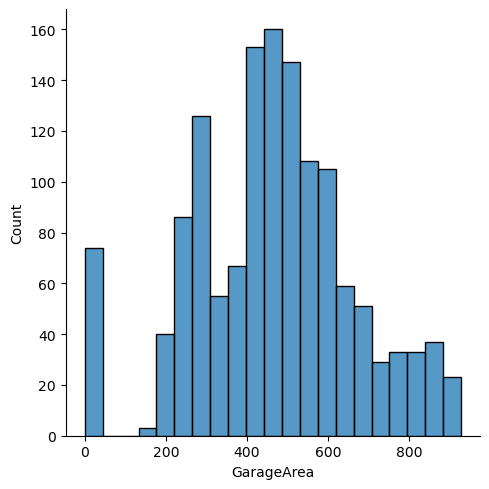

WoodDeckSF : Debe tratarse.
Antes:


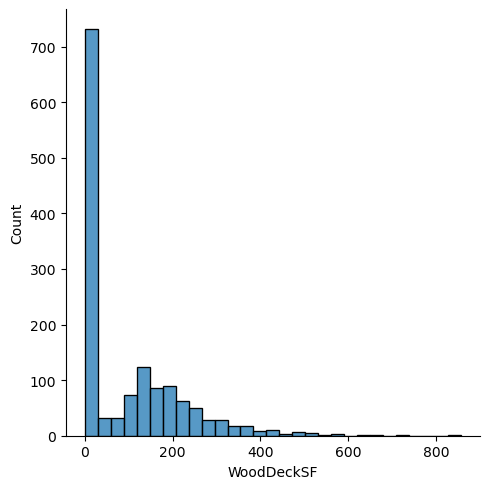

Despues:


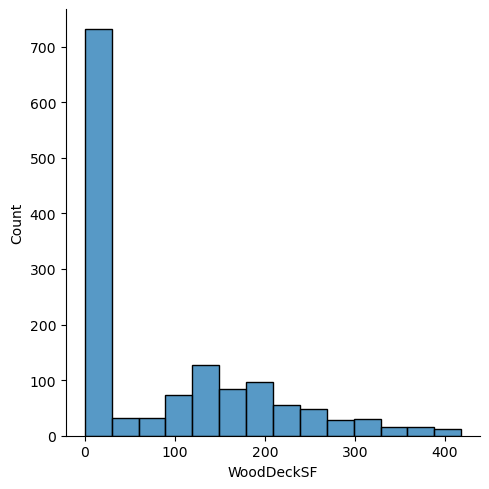

OpenPorchSF : Debe tratarse.
Antes:


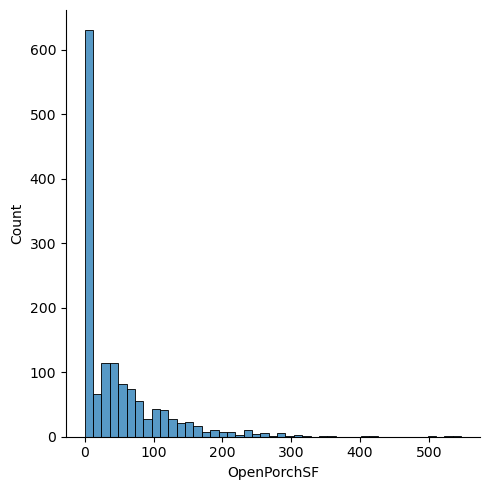

Despues:


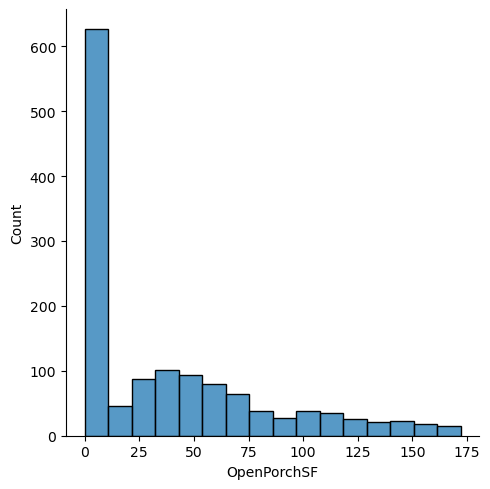

EnclosedPorch : Debe tratarse.
Antes:


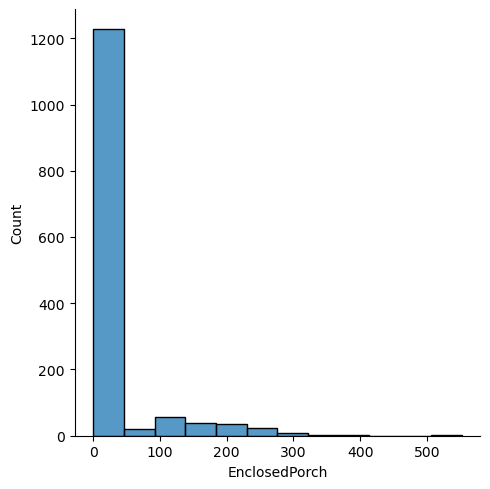

Despues:


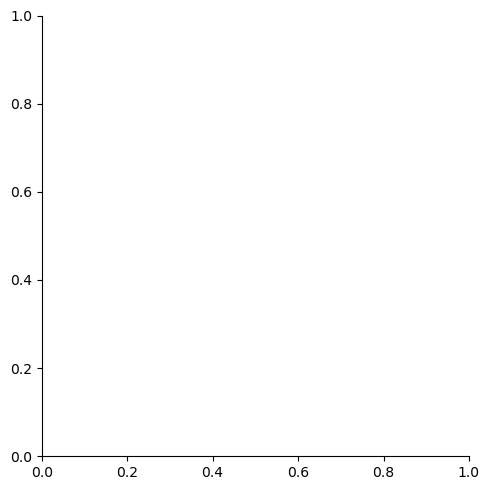

3SsnPorch : Debe tratarse.
Antes:


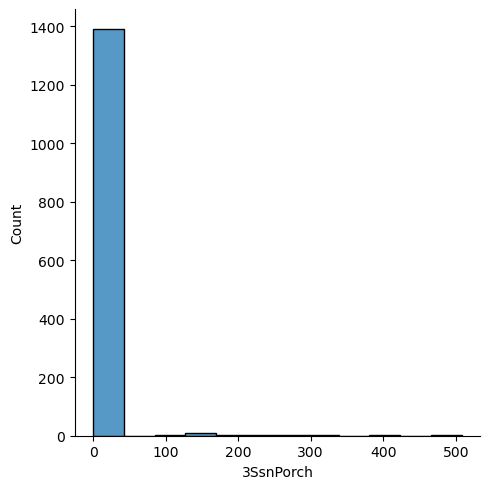

Despues:


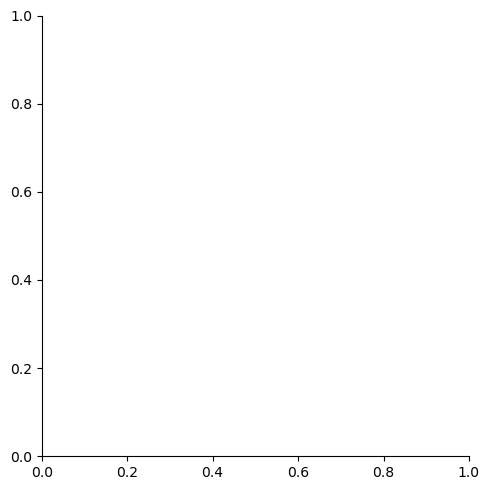

ScreenPorch : Debe tratarse.
Antes:


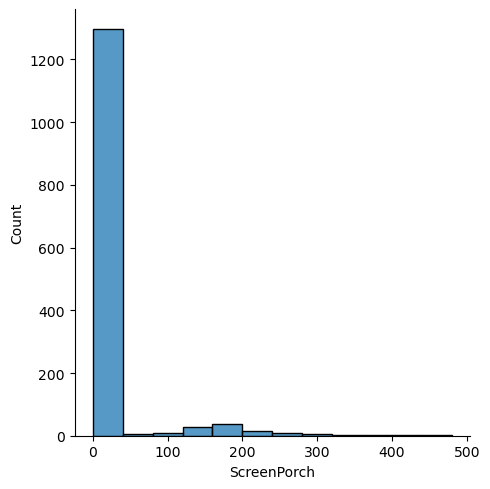

Despues:


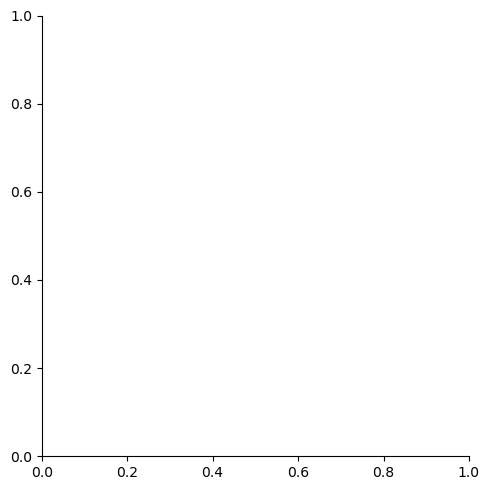

PoolArea : Debe tratarse.
Antes:


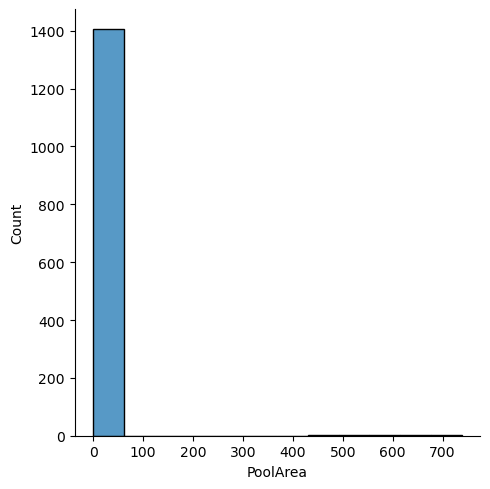

Despues:


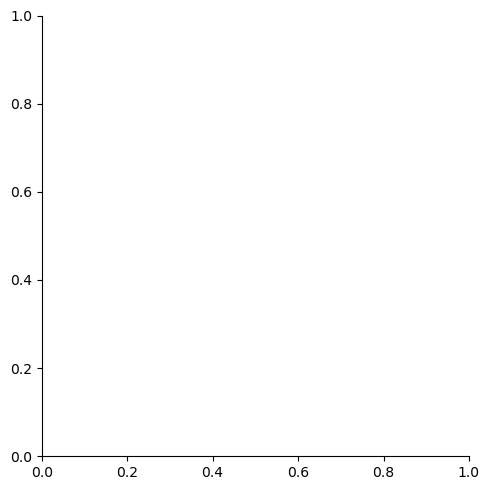

MiscVal : Debe tratarse.
Antes:


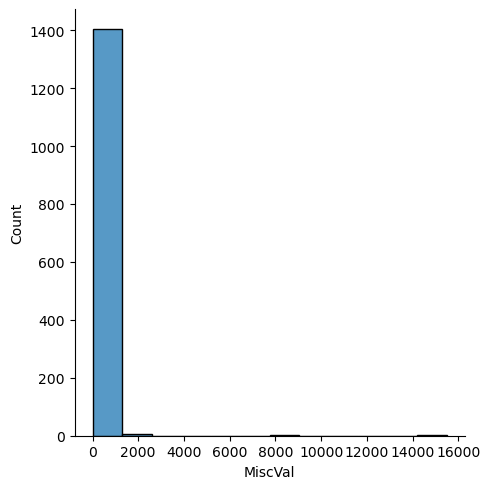

Despues:


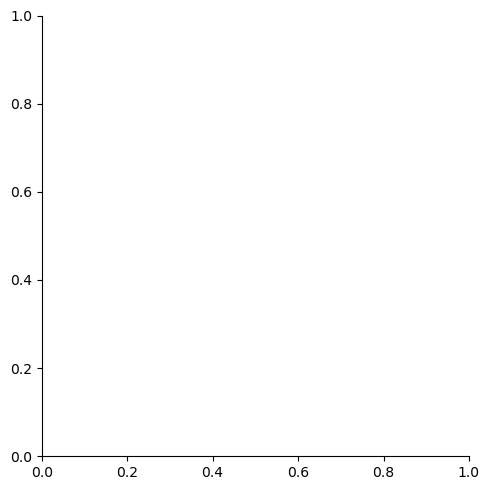

MoSold : No tiene datos anomalos

YrSold : No tiene datos anomalos

SalePrice : Debe tratarse.
Antes:


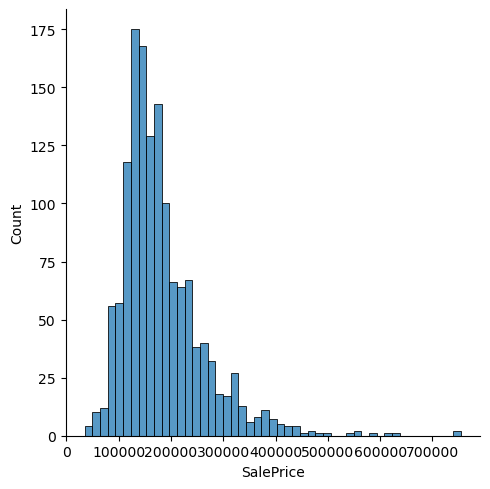

Despues:


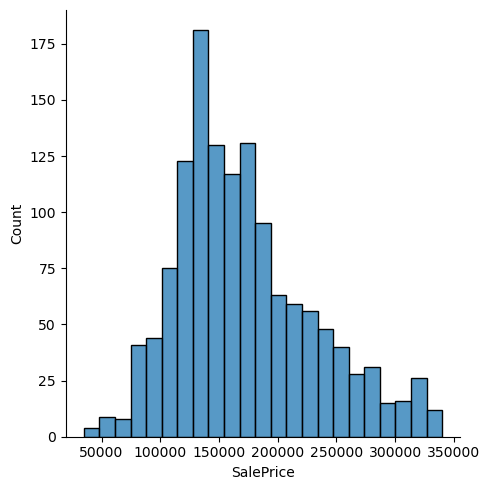

In [23]:
columnas_numericas = df.select_dtypes(include=['number'])
df_n = df.copy()
for columna in columnas_numericas:
    q3 = df[columna].quantile(0.75)
    q1 = df[columna].quantile(0.25)
    iqr = q3 - q1
    lsuperior = q3 + (1.5 * iqr)
    linferior = q1 - (1.5 * iqr)
    if ((df[columna] < linferior).any() or (df[columna] > lsuperior).any()):
        print(columna, ": Debe tratarse.")
        print("Antes:")
        sns.displot(data=df, x="{}".format(columna))
        plt.show()
        df_n = df[(df[columna] > linferior) & (df[columna] < lsuperior)].copy()
        print("Despues:")
        sns.displot(data=df_n, x="{}".format(columna))
        plt.show()
    else:
        print(columna, ": No tiene datos anomalos\n")
        

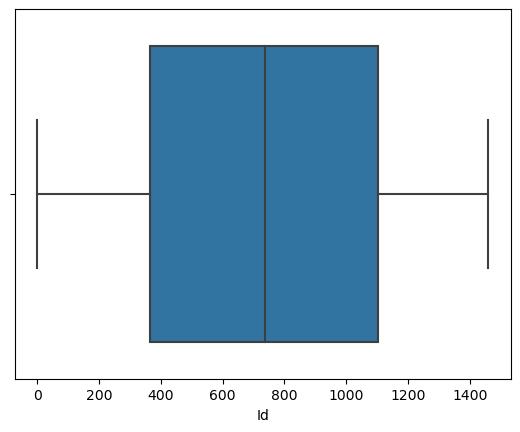

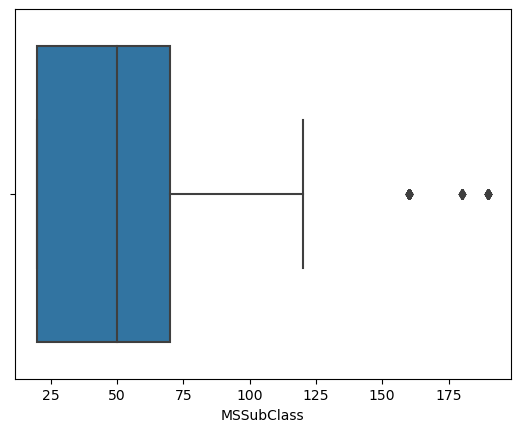

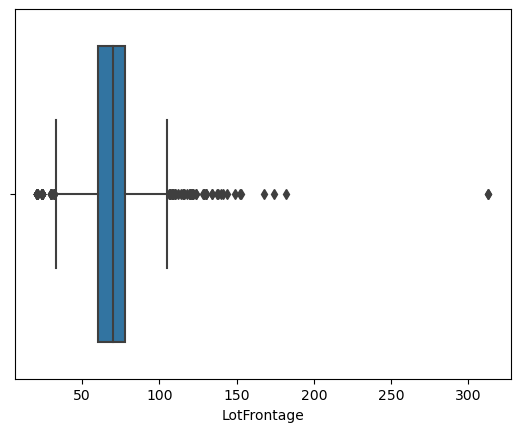

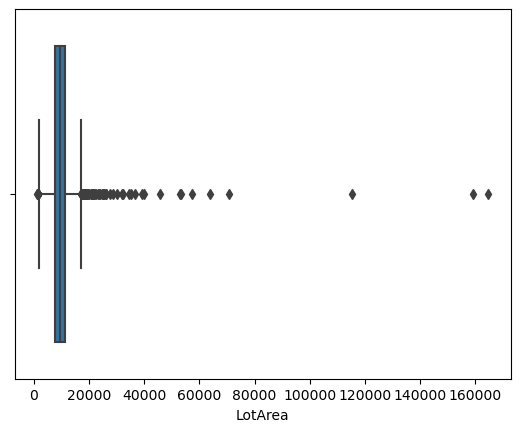

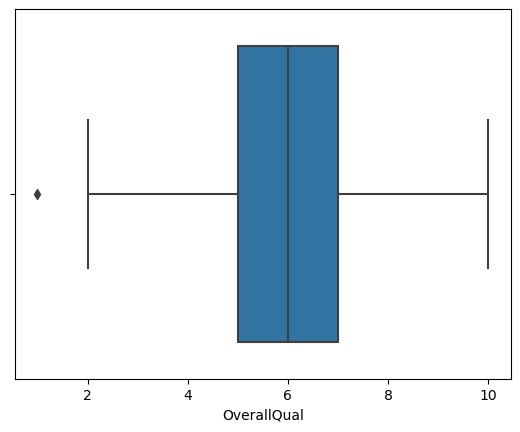

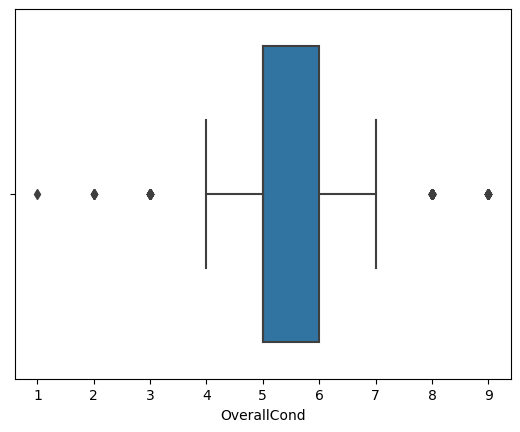

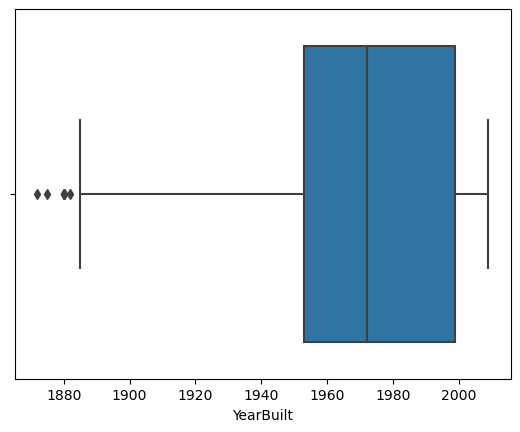

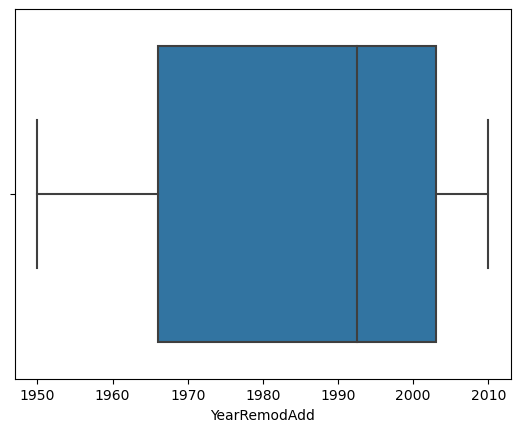

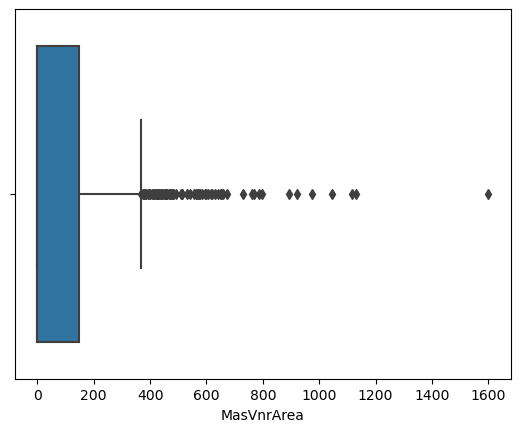

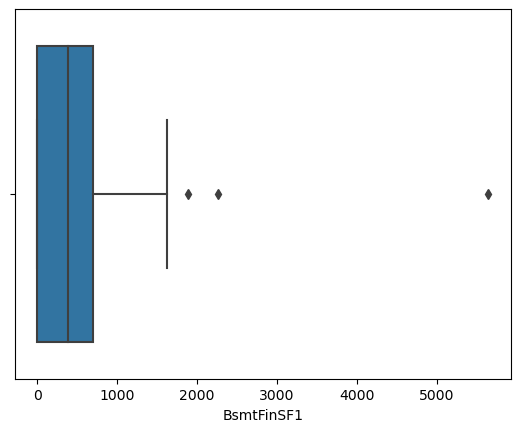

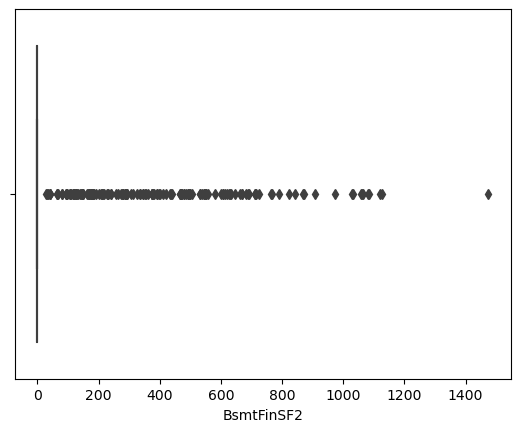

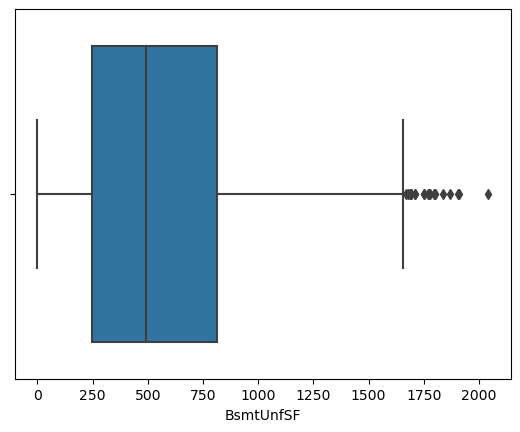

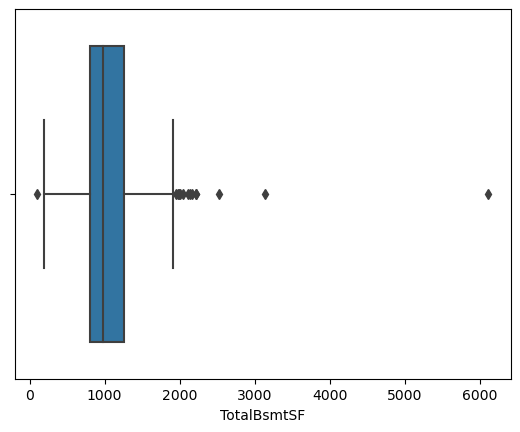

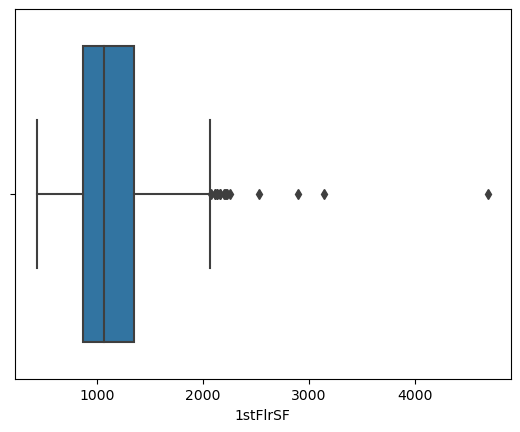

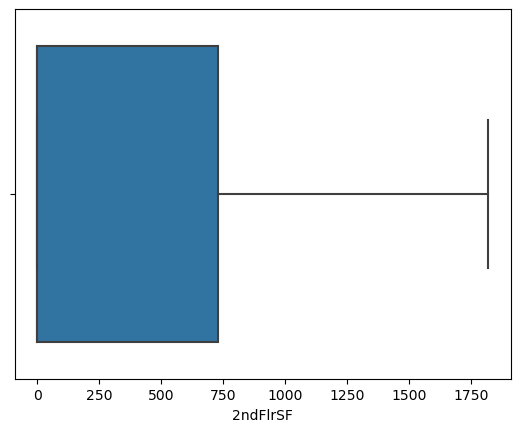

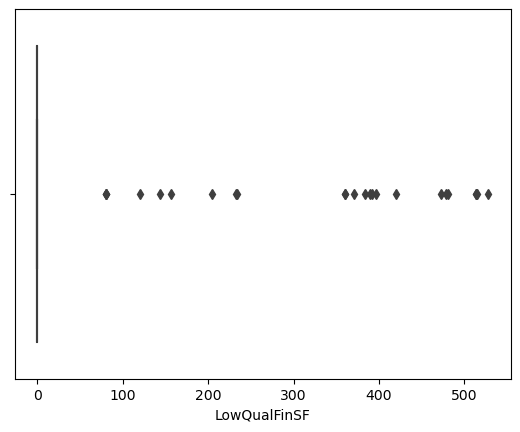

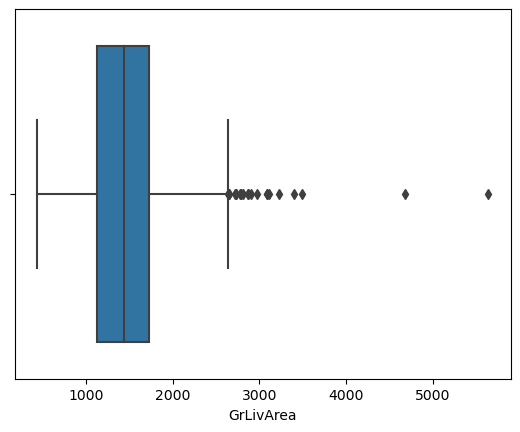

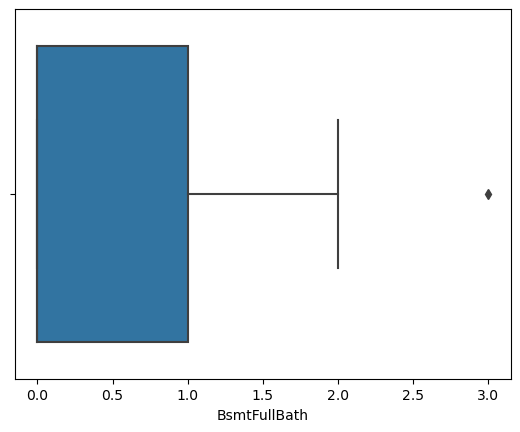

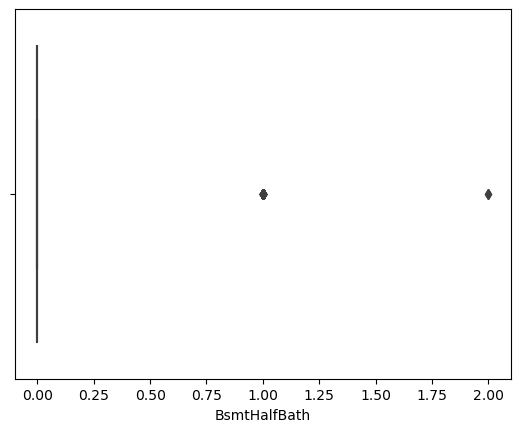

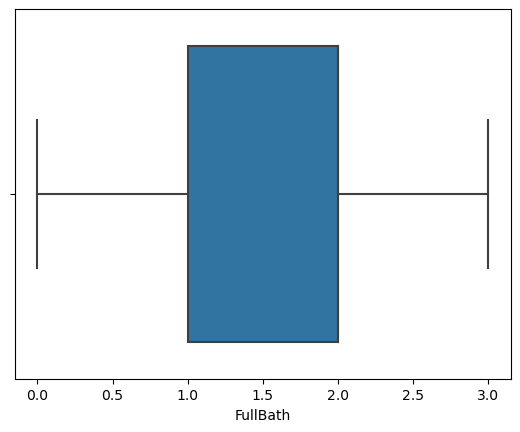

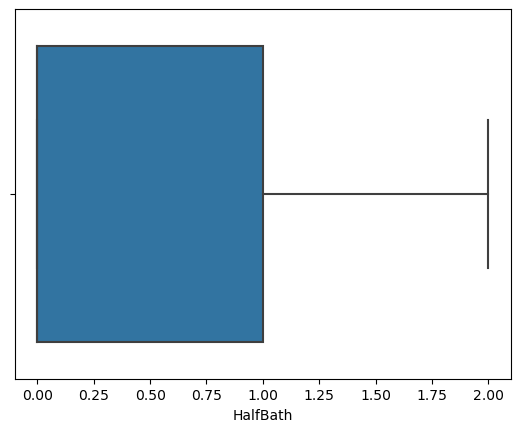

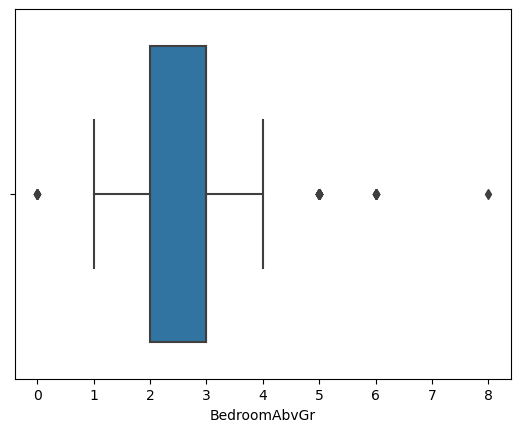

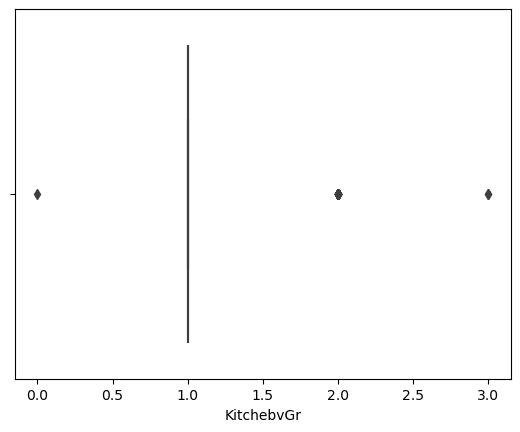

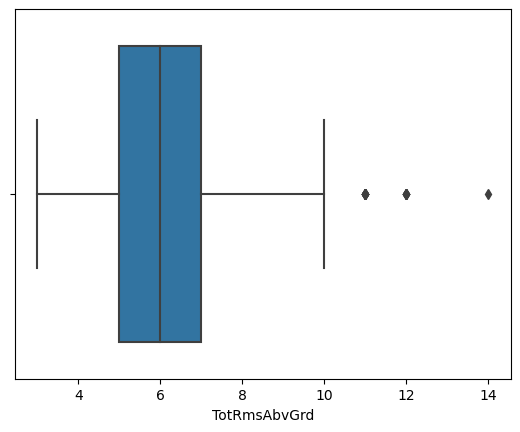

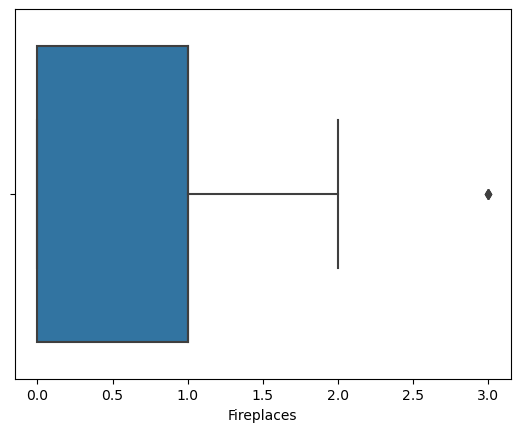

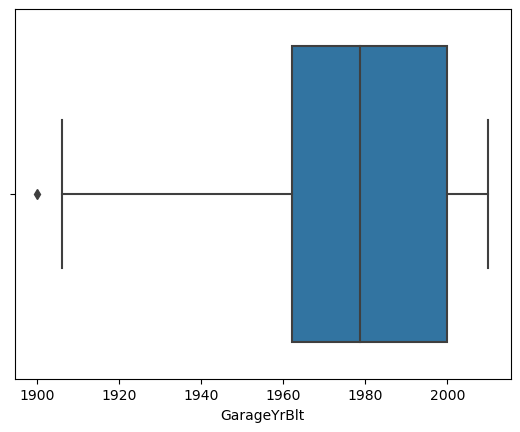

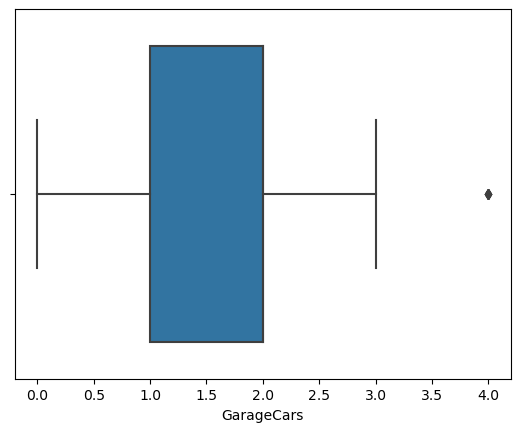

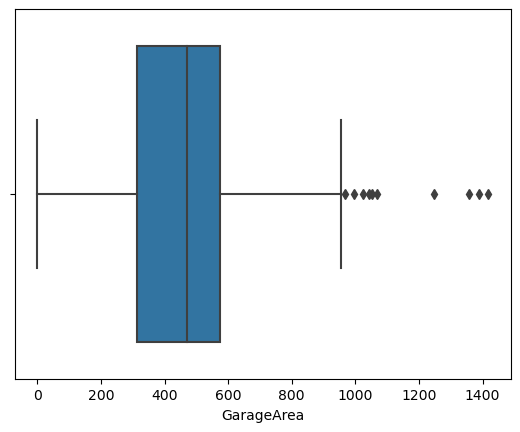

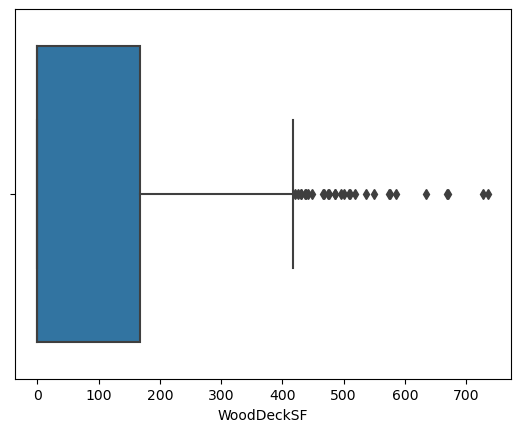

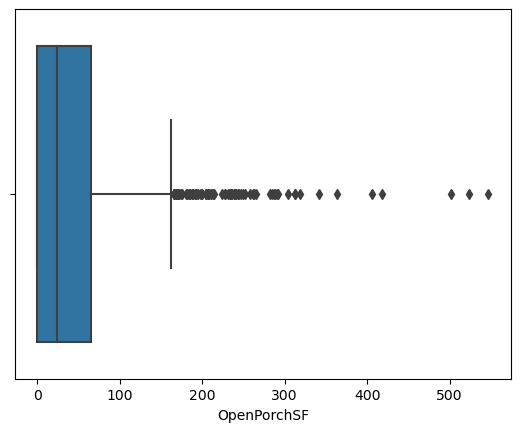

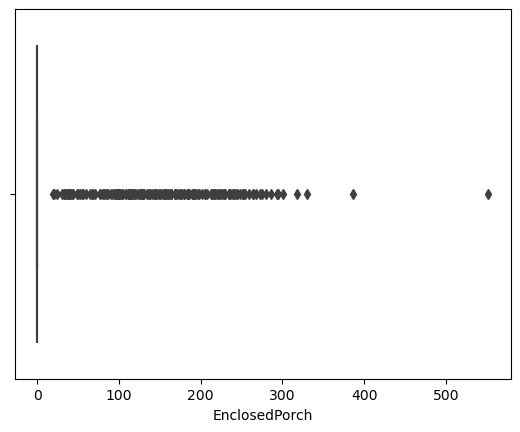

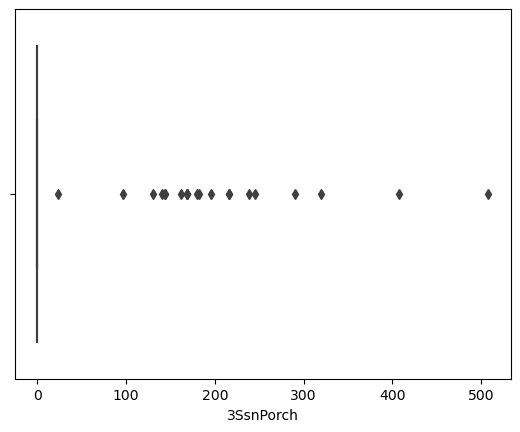

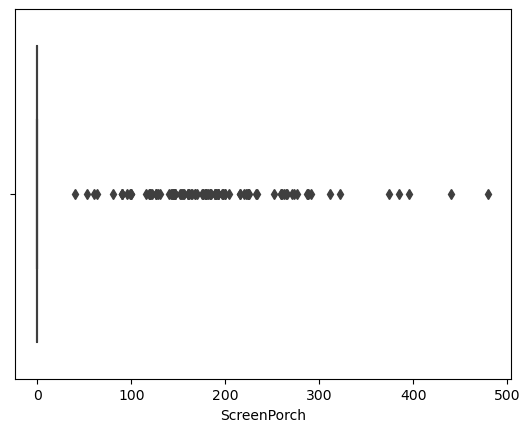

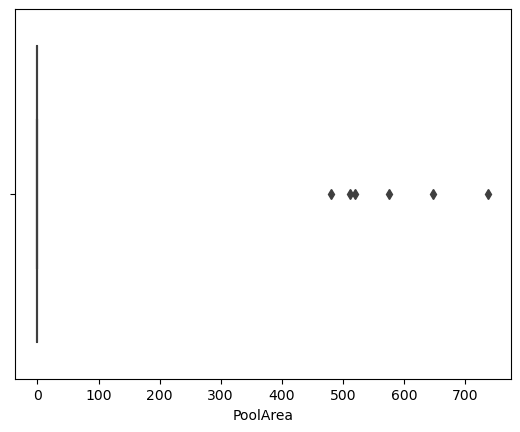

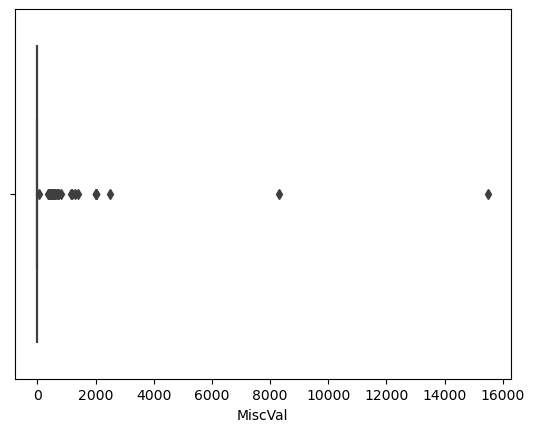

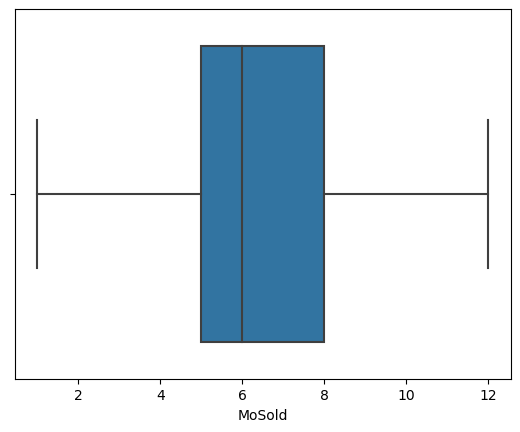

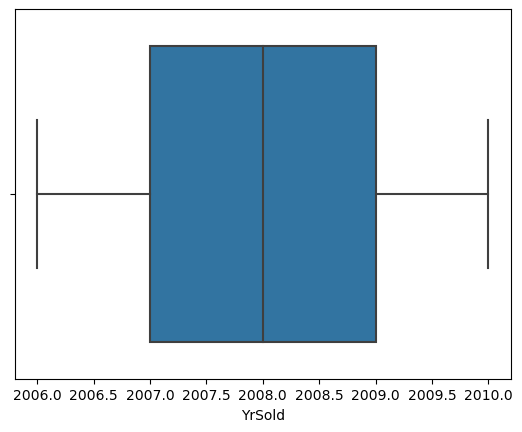

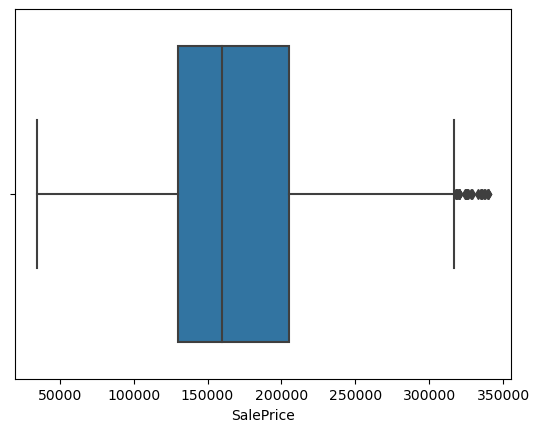

In [24]:
# COn graficas BoxPlot
columnas_numericas = df.select_dtypes(include=['number'])
for column in columnas_numericas:
    if (df_n[column].dtype != "object"):
        sns.boxplot(data=df_n, x="{}".format(column))
        plt.show()

### Paso 4: En base a la exploración previa (paso 3 del análisis y exploración), determinar si alguna columna puede ser categorizada y realizar la categorización.

In [25]:
columnas = df.select_dtypes(include=['object'])
for columna in columnas:
    print(columna, ": ", df_n[columna].nunique(), " valores" )
    print(df_n[columna].unique(), "\n")

MSZoning :  5  valores
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street :  2  valores
['Pave' 'Grvl'] 

LotShape :  4  valores
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour :  4  valores
['Lvl' 'Bnk' 'HLS' 'Low'] 

Utilities :  2  valores
['AllPub' 'NoSeWa'] 

LotConfig :  5  valores
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope :  3  valores
['Gtl' 'Mod' 'Sev'] 

Neighborhood :  25  valores
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'mes' 'SawyerW' 'NridgHt' 'IDOTRR' 'MeadowV'
 'Timber' 'Gilbert' 'ClearCr' 'Edwards' 'NPkVill' 'StoneBr' 'Blmngtn'
 'BrDale' 'SWISU' 'Blueste'] 

Condition1 :  9  valores
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2 :  8  valores
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType :  5  valores
['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs'] 

HouseStyle :  8  valores
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle :  6

<p style="color:blue;">
    Después de haber eliminado los nulos y haber realizado imputación todas las variables de tipo ‘object’ pueden ser categorizadas. Lo digo debido a que la gran mayoría no manejan mas de 10 valores únicos.
</p>

In [26]:
columnas_object = df_n.select_dtypes(include=['object']).columns
df_n[columnas_object] = df_n[columnas_object].astype('category')

In [27]:
print(df_n.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1352 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1352 non-null   int64   
 1   MSSubClass     1352 non-null   int64   
 2   MSZoning       1352 non-null   category
 3   LotFrontage    1352 non-null   float64 
 4   LotArea        1352 non-null   int64   
 5   Street         1352 non-null   category
 6   LotShape       1352 non-null   category
 7   LandContour    1352 non-null   category
 8   Utilities      1352 non-null   category
 9   LotConfig      1352 non-null   category
 10  LandSlope      1352 non-null   category
 11  Neighborhood   1352 non-null   category
 12  Condition1     1352 non-null   category
 13  Condition2     1352 non-null   category
 14  BldgType       1352 non-null   category
 15  HouseStyle     1352 non-null   category
 16  OverallQual    1352 non-null   int64   
 17  OverallCond    1352 non-null   int64  

### Paso 5: De las columnas categorizadas, buscar si hay inconsistencias, en caso de que las haya, hay que mostrarlas y tratarlas.

<p style="color:blue;">
    Apoyándome del ciclo utilizado en el paso anterior (Paso 4) no me percaté de ninguna inconsistencia en las columnas categóricas, por lo que no hay necesidad de tratar ninguna categoría.
</p>

## Manipulación y preparación de los datos.

### Paso 1: Mostrar la matriz de correlación de nuevo, identificar las columnas que más esté correlacionadas con "SalePrice", mostrar numéricamente las 10 variables que estén correlacionadas más fuertemente a la variable objetivo.

<Axes: >

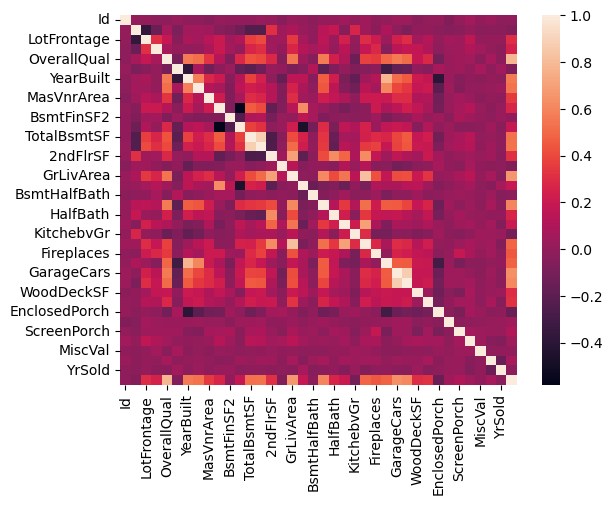

In [28]:
sns.heatmap(df_n.corr(numeric_only=True))

In [29]:
print(df_n.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)[1:11])

OverallQual     0.778263
GrLivArea       0.662691
GarageCars      0.630427
GarageArea      0.605079
FullBath        0.595937
YearBuilt       0.561447
1stFlrSF        0.535104
YearRemodAdd    0.533505
TotalBsmtSF     0.526688
TotRmsAbvGrd    0.483028
Name: SalePrice, dtype: float64


### Paso 2: Responder las preguntas.

1. ¿Con las variables numéricas que se tienen es suficiente para predecir la variable objetivo?

<p style="color:blue;">
    Me gustaría responder; sí. A pesar de haber eliminado los valores nulos y tratar las anomalías sigue habiendo variables con una correlación mayor a 0.5. De hecho, 9 de las 10 columnas más correlacionadas están por encima del 0.5.
</p>

2. ¿Alguna de las variables categóricas servirá realmente para determinar la variable objetivo?

<p style="color:blue;">
    Sí, la variable ‘OverallQual’.
</p>

### Paso 3: Conversión de categórico a numérico. Hay que seleccionar las columnas que ya fueron categorizadas y hay que sacar su valor con un "one-hot encoder", luego hay que agregarlas al dataset y eliminar su columna categórica. Hay que mostrar de nuevo las correlaciones para ver si cambiaron las variables más correlacionadas con la variable objetivo.

<p style="color:blue;">
    Para seleccionar las columnas voy a revisar que tengan como máximo 4 posibles valores, y a esas columnas se les aplicará one-hot encoder.
</p>

In [30]:
df = df_n.copy()
columnas = df_n.columns
for columna in columnas:
    if (df_n[columna].dtype == "category"):
        if (df_n[columna].nunique() <= 4):
            print("La columna: ", columna, " se selecciona para one-hot encoder. Valores: ")
            print(df_n[columna].unique())
            df_dummies = pd.get_dummies(df_n[columna], dtype='int64')
            df = pd.concat([df, df_dummies], axis=1)
            df = df.drop(columna, axis=1)


            


La columna:  Street  se selecciona para one-hot encoder. Valores: 
['Pave', 'Grvl']
Categories (2, object): ['Grvl', 'Pave']
La columna:  LotShape  se selecciona para one-hot encoder. Valores: 
['Reg', 'IR1', 'IR2', 'IR3']
Categories (4, object): ['IR1', 'IR2', 'IR3', 'Reg']
La columna:  LandContour  se selecciona para one-hot encoder. Valores: 
['Lvl', 'Bnk', 'HLS', 'Low']
Categories (4, object): ['Bnk', 'HLS', 'Low', 'Lvl']
La columna:  Utilities  se selecciona para one-hot encoder. Valores: 
['AllPub', 'NoSeWa']
Categories (2, object): ['AllPub', 'NoSeWa']
La columna:  LandSlope  se selecciona para one-hot encoder. Valores: 
['Gtl', 'Mod', 'Sev']
Categories (3, object): ['Gtl', 'Mod', 'Sev']
La columna:  ExterQual  se selecciona para one-hot encoder. Valores: 
['Gd', 'TA', 'Ex', 'Fa']
Categories (4, object): ['Ex', 'Fa', 'Gd', 'TA']
La columna:  BsmtQual  se selecciona para one-hot encoder. Valores: 
['Gd', 'TA', 'Ex', 'Fa']
Categories (4, object): ['Ex', 'Fa', 'Gd', 'TA']
La column

In [35]:
#Resultado
print(df.info())
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
Index: 1352 entries, 0 to 1459
Columns: 109 entries, Id to Y
dtypes: category(24), float64(3), int64(82)
memory usage: 979.7 KB
None
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCo

<p style="color:blue;">
    Hasta ahora me percaté de que varias columnas creadas con el one-hot encoder tienen el mismo nombre, por lo que puede que lo mejor hubiese sido clasificarlas con otro tipo de encoder.
</p>

### Paso 4: Conversión de las demás columnas objeto a numérico. Para ello se va a requerir un encoder más avanzado, usar la clase "MultiColumnLabelEncoder" vista en clase, el dataframe resultante va a ser la versión consolidada y completamente numérica.

### Paso 5: Mostrar la información del nuevo dataframe (numérico), mostrar que no contenga nulos, que todos los datos sean de tipo int/float/uint. Mostrar de nuevo las correlaciones, filtrar para que solo muestre las 10 más correlacionadas a la variable objetivo.

## Presentación del proyecto

### Paso 1: Crear un repositorio en GitHub.
### Paso 2: Subir el trabajo a ese repositorio y crear un archivo README.
### Paso 3: En el README, describir el trabajo, así como describir qué resulta de este proyecto.
### Paso 4: Volver público el repositorio, validar acceso desde fuera y guardar el enlace.
### Paso 5: Enviar el enlace y los demás archivos al profesor para su evaluación (a través de Teams).

## Conclusiones acerca del análisis exploratorio y del dataset en general.

<p style="color:blue;">
    Durante el desarrollo de este proyecto puse en practica varios de los procesos aprendidos en clase e incluso hice el esfuerzo por automatizar los procesos mas repetitivos por medio de ciclos. En este dataset se tuvo que lidiar con datos nulos y anomalías, no se detectaron inconsistencias en las columnas categóricas, y hasta el avance logrado se pudieron detectar varias correlaciones fuertes con respecto a la variable objetivo ‘SalePrice’. En punto actual en el que se encuentra el dataframe se puede apreciar que la cantidad de columnas incrementó notoriamente y la cantidad de registros decremento, pero por fortuna no fueron muchos los registros que se perdieron en el proceso.
</p>